In [15]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [16]:
# Load merged database
dfMerged = pd.read_pickle('Merged_Database.pkl')

# Data Overview

Uses events in [IFAW Mass Stranding Data 1999-2014 V2.xlsx](https://docs.google.com/spreadsheets/d/1EuTH3vjfO53wim7KF0MYMQ8vz8uNUUoxb_rTgnzaB3M)

* `NUM_ANIMALS` column is number of animals with condition code = 1 on a given day.
* Animals could have been found at different locations and species may differ.

Experiment: If `t` is the day of event, find snippets of time series from another data variable `D`:

```
Event 1  : D(t-5),D(t-4),...,D(t),...,D(t+4),D(t+5)
Event 2  : D(t-5),D(t-4),...,D(t),...,D(t+4),D(t+5)
...
Event 121: D(t-5),D(t-4),...,D(t),...,D(t+4),D(t+5)
```

Epoch analysis: Average columns of above "matrix". The "epoch time series" is this average. In the above example, the epoch time series will have 11 values.
    
If there is a clear trend in the averages, we can claim that `D` is a potential "driver" of events.

Sanity check: Also consider 121 randomly selected events days in the interval 1999-2014 and plot the corresponding epoch time series.

In [17]:
# Find locations where one or more animals stranded.
dfEvents = dfMerged[(dfMerged['NUM_ANIMALS'] > 0)]
#dfEvents = dfMerged[(dfMerged['count'] > 0)]
#dfEvents = dfMerged[(dfMerged['SPECIES_Lagenorhynchus acutus'] > 0)]
#dfEvents = dfMerged[(dfMerged['SPECIES_Delphinus delphis'] > 0)]

In [18]:
dfEvents.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,...,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,...,-1.104167,1011.250000,8.690000,-1.597614,16.291667,11.183859,207.541667,13.054167,2.666667,3.387917
1999-03-19,22.0,22.0,0,0,0,22,0,0,11.949498,-8.729407,...,4.841667,1006.508333,3.897083,-8.355658,11.333333,2.018261,283.916667,9.070833,2.333333,0.904167
1999-03-20,7.0,7.0,0,0,0,7,0,0,9.546653,-10.228525,...,2.495833,1016.616667,4.191250,-5.441022,7.812500,2.364091,264.625000,6.412500,2.233333,0.584167
1999-03-22,1.0,1.0,0,0,0,1,0,0,12.769986,-12.060864,...,5.554167,1006.295833,7.371667,6.427154,14.487500,-5.673161,138.583333,11.633333,2.491667,2.464167
1999-06-27,2.0,2.0,0,2,0,0,0,0,0.939208,-5.214719,...,21.095833,1013.100000,7.572917,-0.403344,4.154167,-1.916401,185.708333,3.608333,18.645833,0.309583


In [19]:
dfEvents.describe()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,...,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,118.000000,118.000000,...,99.000000,46.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000
mean,4.630252,16.016807,2.294118,0.554622,0.067227,1.680672,0.016807,0.016807,1.826831,-6.571727,...,6.761486,1014.764720,7.023388,-1.300127,8.728556,1.060164,195.538506,7.113571,7.986572,1.259465
std,6.033614,40.589091,3.203158,5.153076,0.532520,3.241502,0.183340,0.183340,10.563610,3.386071,...,6.818244,9.133573,2.379494,4.523453,3.478175,4.816899,78.268655,2.790444,5.332127,0.894715
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.960156,-16.825131,...,-9.383333,995.108333,2.756667,-11.795658,2.983333,-9.089565,16.166667,1.783333,2.233333,0.216667
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.356640,-8.628267,...,2.402083,1008.389583,5.259479,-4.304011,5.668750,-2.301093,141.145833,4.766667,4.172917,0.633324
50%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.418280,-6.870233,...,5.554167,1014.204257,6.895761,-0.659334,8.370833,0.828517,207.541667,6.875000,5.870833,0.989783
75%,5.000000,11.000000,3.500000,0.000000,0.000000,2.000000,0.000000,0.000000,8.465461,-5.042952,...,9.320833,1019.788542,8.658333,2.226791,10.935417,3.749162,258.541667,8.900000,10.260417,1.527292
max,56.000000,286.000000,16.000000,56.000000,5.000000,22.000000,2.000000,2.000000,21.391680,3.955269,...,22.200000,1033.387500,12.297083,9.301363,16.995833,13.574816,330.625000,13.662500,20.950000,4.677917


In [20]:
def epoch(variable):
    dfEpoch  = pd.DataFrame()
    dfEpoch2 = pd.DataFrame()
    k = 0
    k2 = 0

    # Loop over each date with a stranding
    for index, row in dfEvents.iterrows():
        r = dfMerged.index.get_loc(index) # Get integer index corresponding to date index
        r2 = np.random.choice(len(dfMerged.index)) # Get random integer index
        # Extract chunk of time series around date. Subtract off value on date
        d = dfMerged[variable].iloc[r-int(N/2)+1:r+int(N/2)+1] - dfMerged[variable].iloc[r]
        d = d.values
        d2 = dfMerged[variable].iloc[r2-int(N/2)+1:r2+int(N/2)+1]- dfMerged[variable].iloc[r2]
        d2 = d2.values
        # Length may be smaller than N if event occured at start or end of available date range
        if len(d) == N:
            c = index.isoformat()[0:10]  # Create time stamp.
            # Rename column to be YYYY-MM-DD of stranding.
            #dfEpoch.rename(index=str, columns={k: c},inplace=True)
            dfEpoch[c] = d
            k = k+1
        if len(d2) == N:
            c2 = str(dfMerged.index.values[r2])[0:10]  # Create time stamp.
            # Rename column to be YYYY-MM-DD of stranding.
            #dfEpoch2.rename(index=str, columns={k2: c2},inplace=True)
            dfEpoch2[c2] = d2
            k2 = k2+1
    return dfEpoch,dfEpoch2

In [21]:
def epochplot(dfEpoch,dfEpoch2,variable):
    m = dfEpoch.mean(axis=1) # Average across columns
    s = dfEpoch.std(axis=1)/np.sqrt(len(dfEpoch.columns)) # Standard error across columns
    e = np.linspace(-int(N/2)+1,int(N/2),N) # Epoch day

    m2 = dfEpoch2.mean(axis=1) # Average across columns
    s2 = dfEpoch2.std(axis=1)/np.sqrt(len(dfEpoch2.columns)) # Standard error across columns
    e2 = np.linspace(-int(N/2)+1,int(N/2),N) # Epoch day

    fig = plt.figure(figsize=(7, 3), dpi=300,)
    fig.clf()

    fig.subplots(1, 2)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(1, 2, 1)
    plt.errorbar(e,m,yerr=s,fmt='o')
    plt.plot(e,m.mean()*np.ones(N))
    plt.xlabel('Day since stranding event')
    plt.ylabel(variable);
    #plt.legend(['Average across events and epoch days','Average across events'])
    plt.title('N = %d (Actual)' % len(dfEpoch.columns))

    plt.subplot(1, 2, 2)
    plt.errorbar(e2,m2,yerr=s2,fmt='o')
    plt.plot(e2,m2.mean()*np.ones(N))
    plt.xlabel('Day since stranding event')
    plt.ylabel(variable);
    #plt.legend(['Average across events and epoch days','Average across events'])
    plt.title('N = %d (Random)' % len(dfEpoch2.columns));

In [22]:
import re
columns = []
exclude = 'SPECIES_|NUM_ANIMALS|CONDITION'
#include = 'Tide'
include = '.*'
for c in dfEvents.columns.values:
    if re.search(exclude,c) == None: 
        if re.search(include,c):
            columns.append(c)

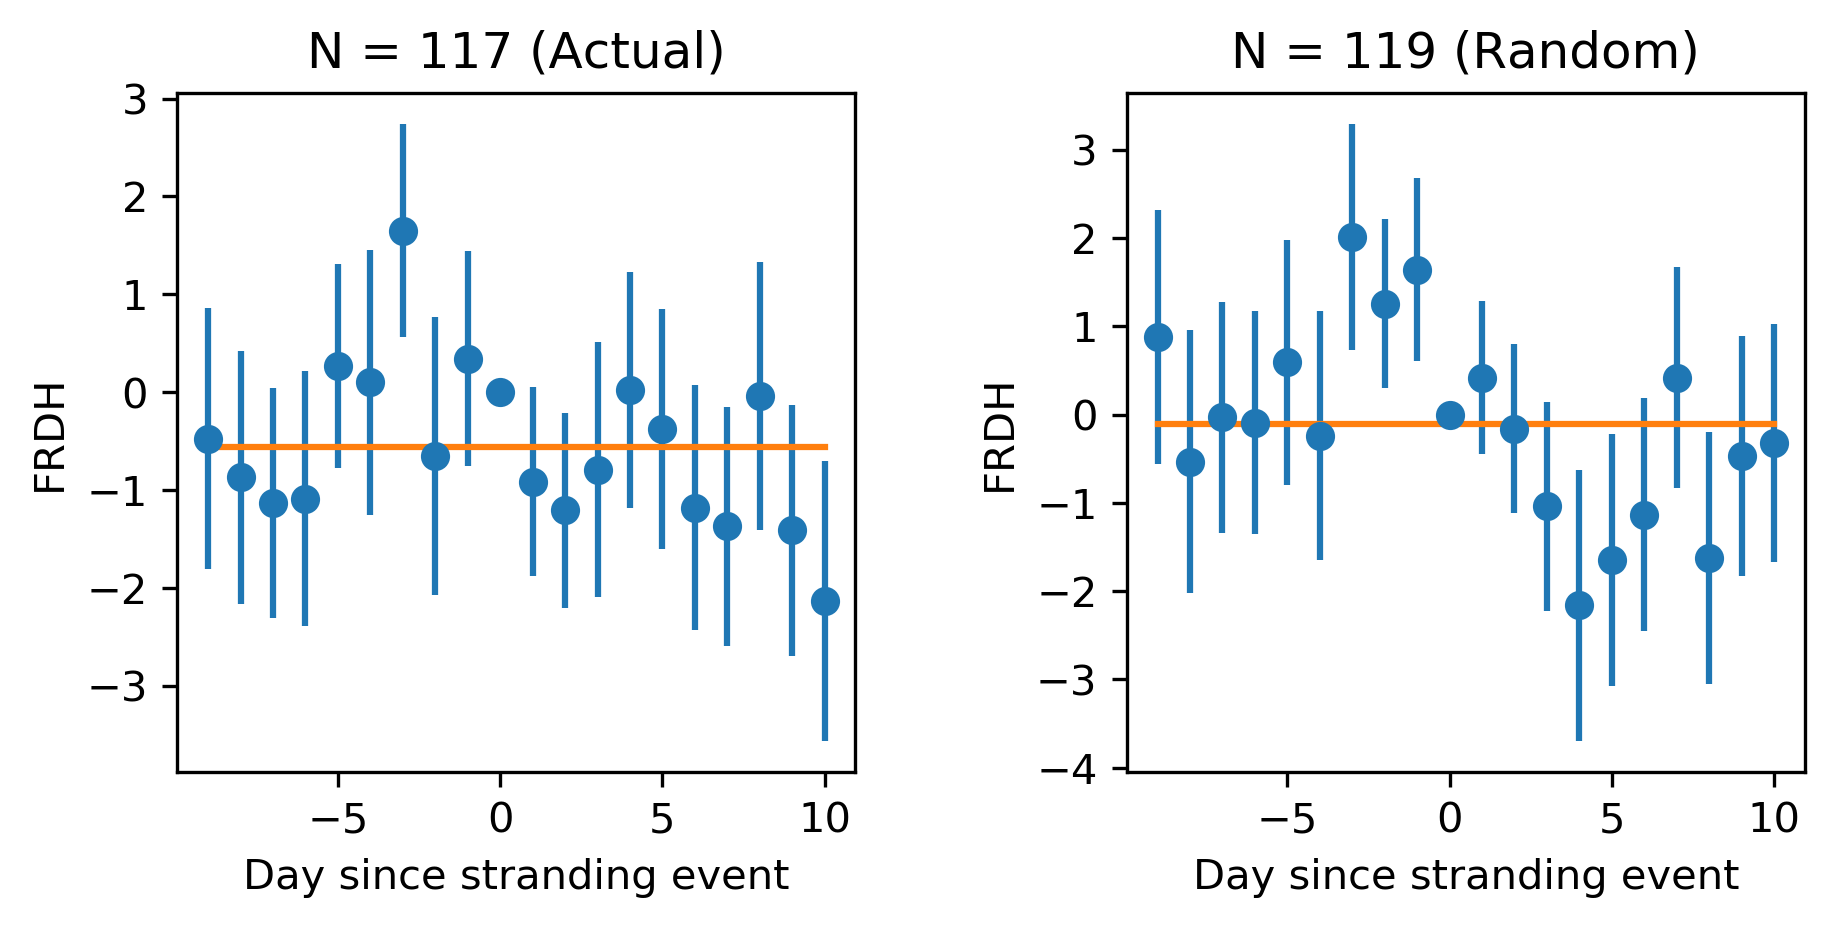

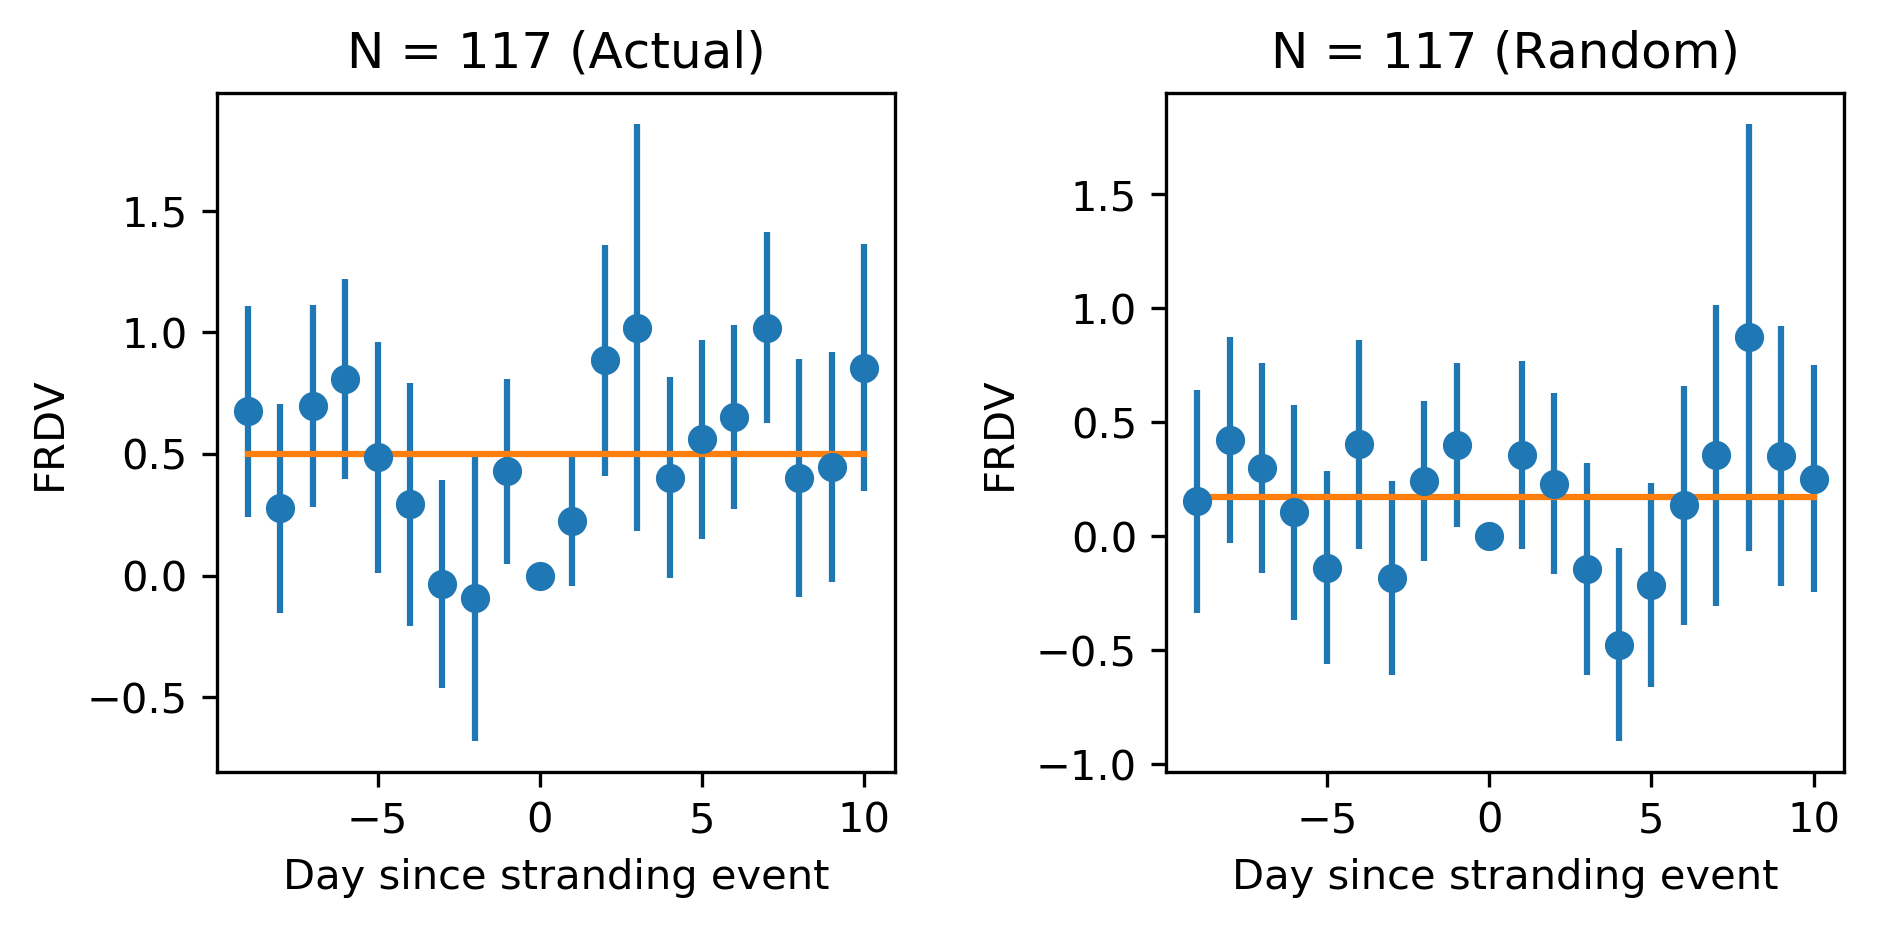

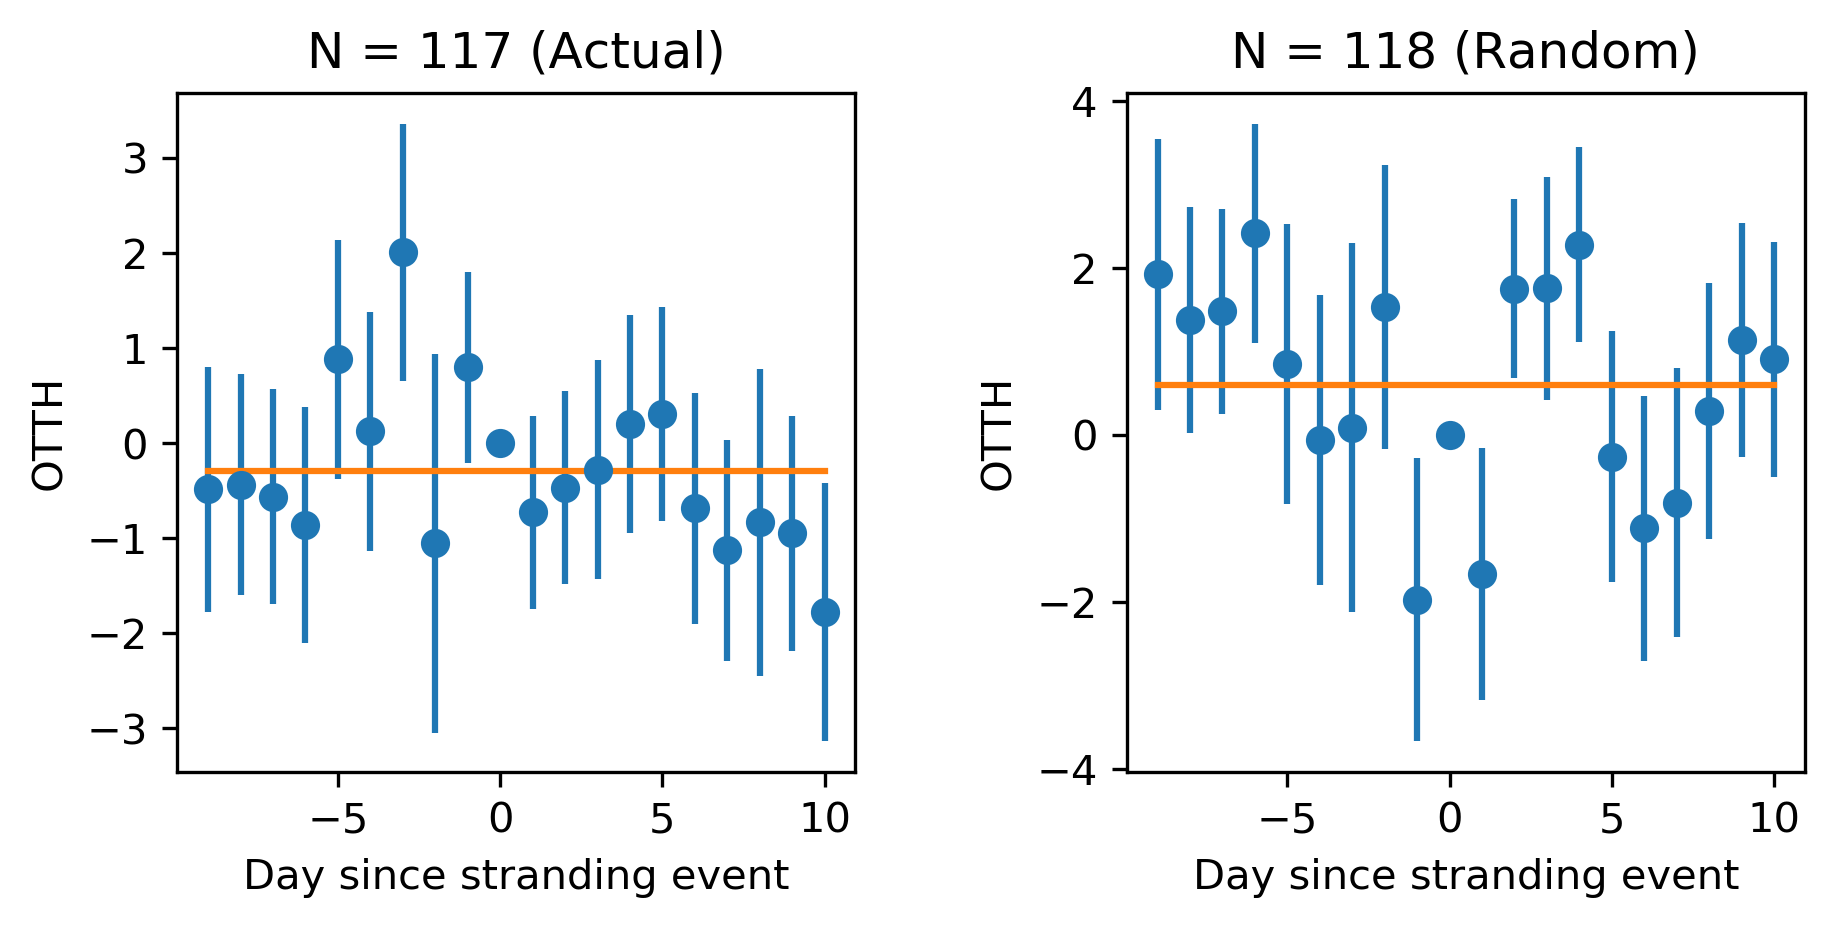

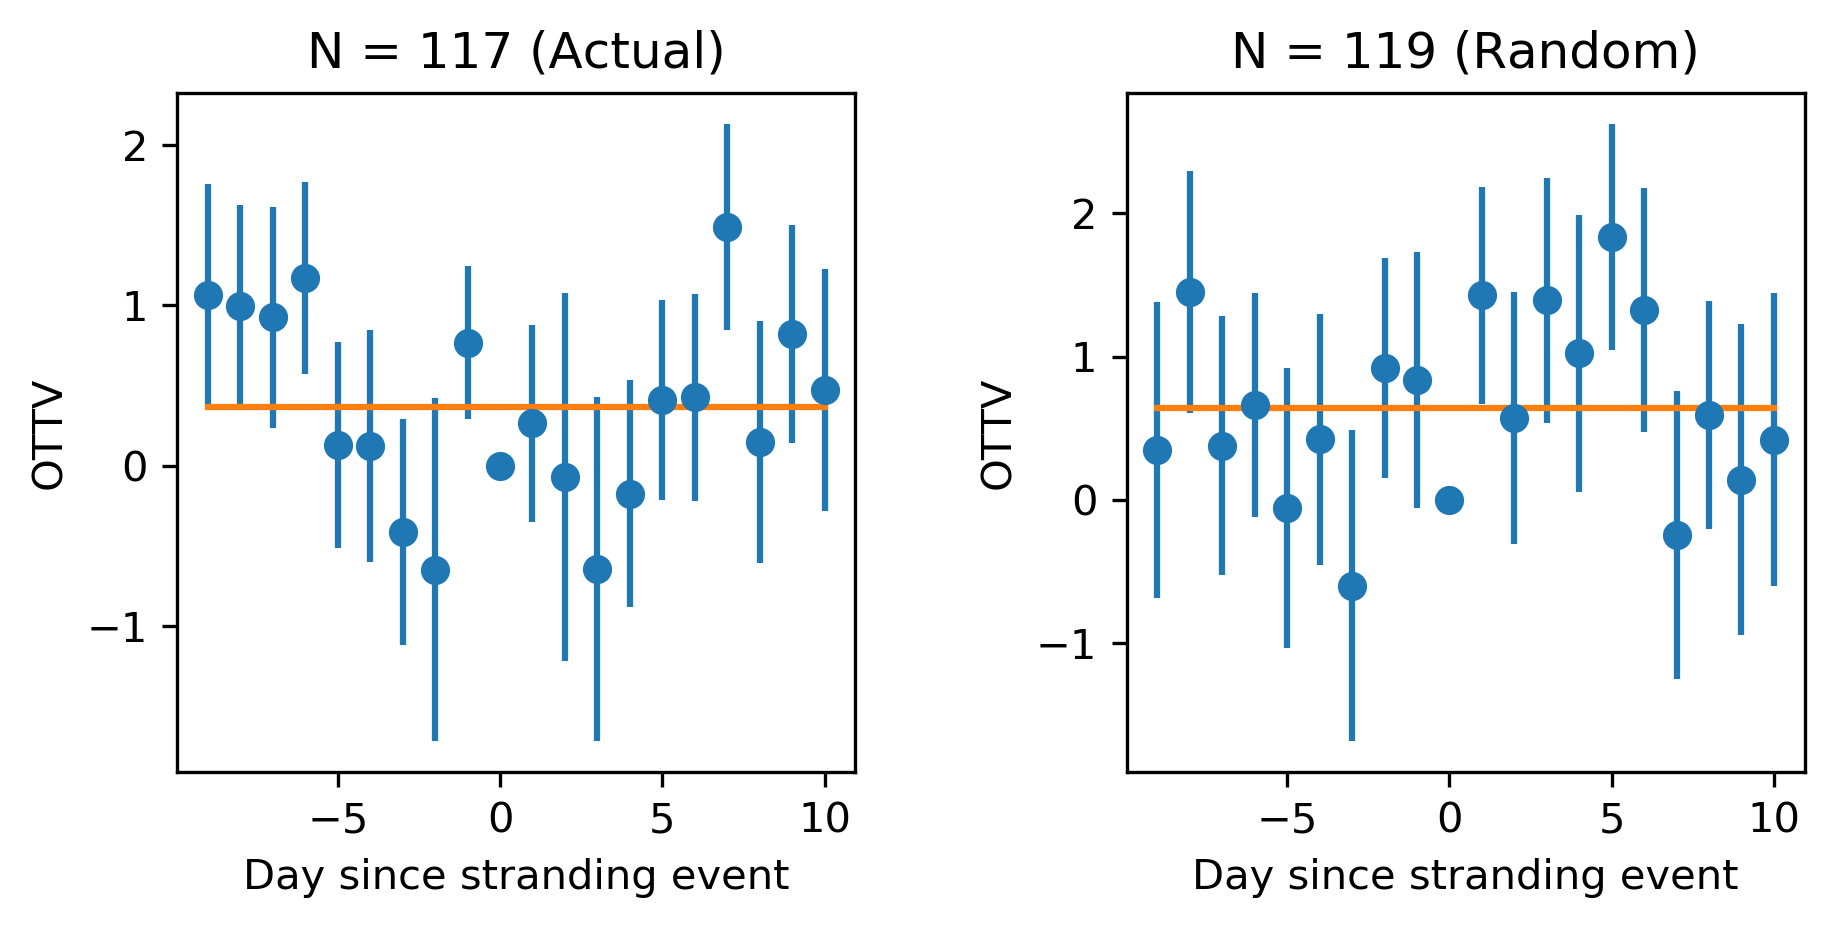

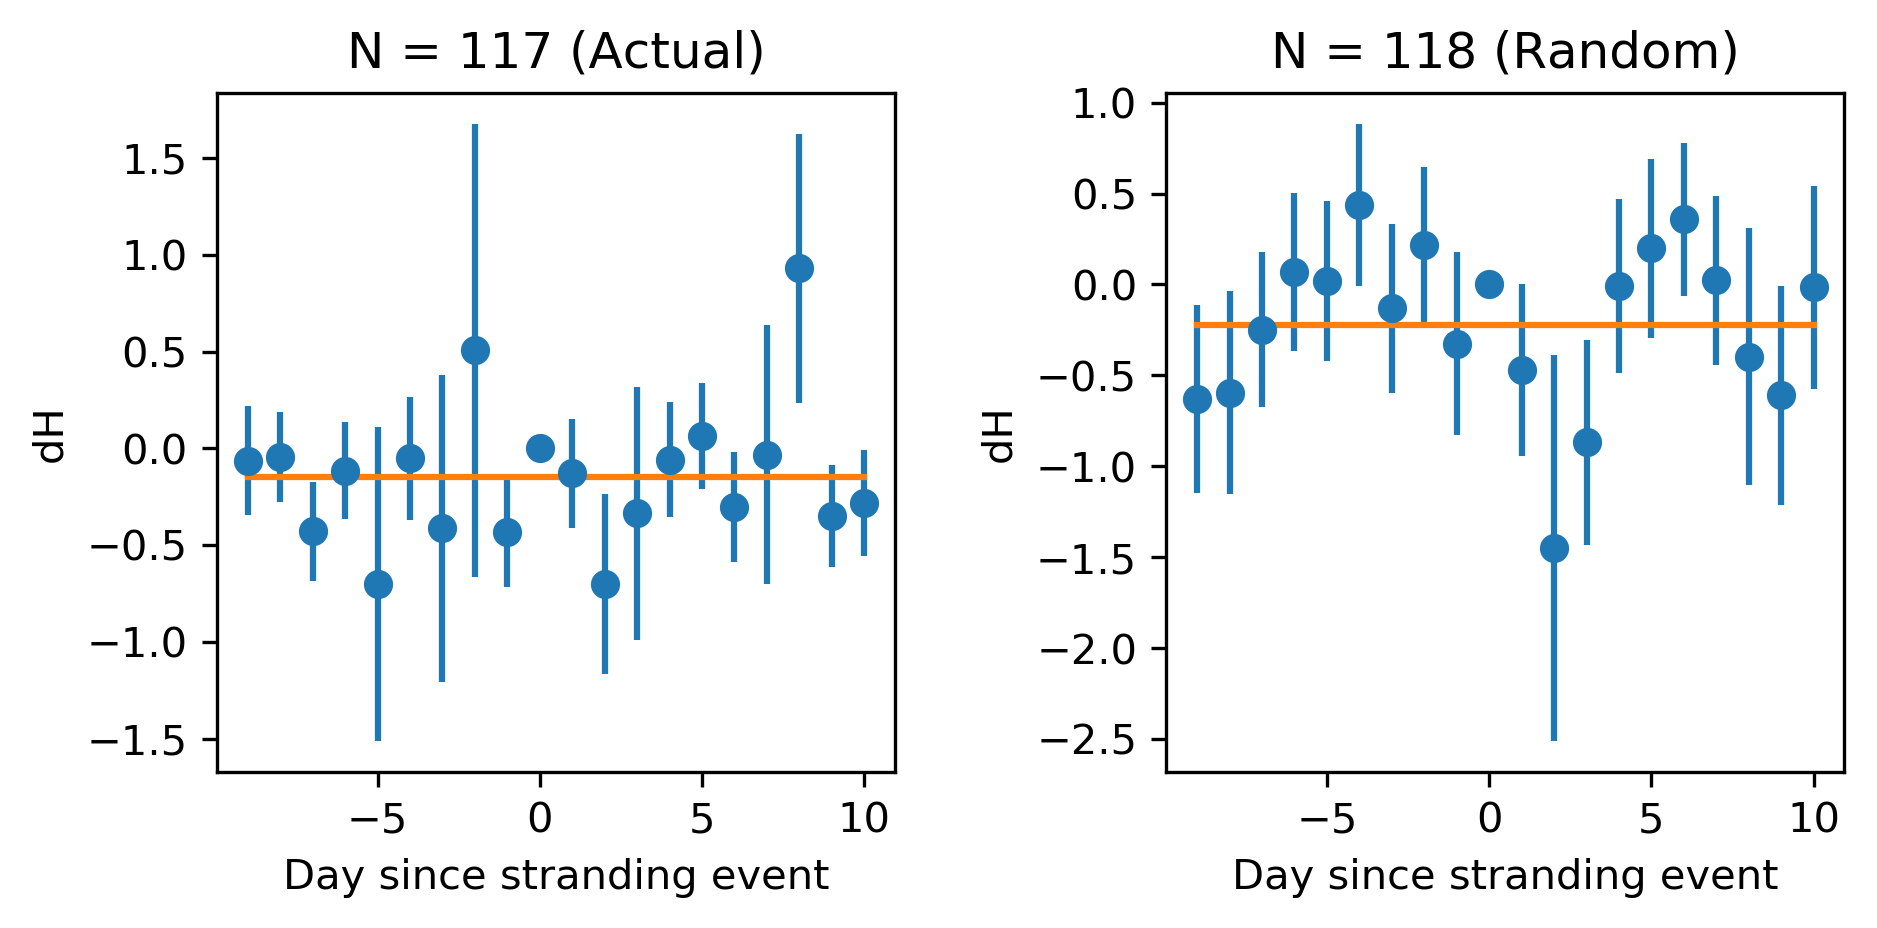

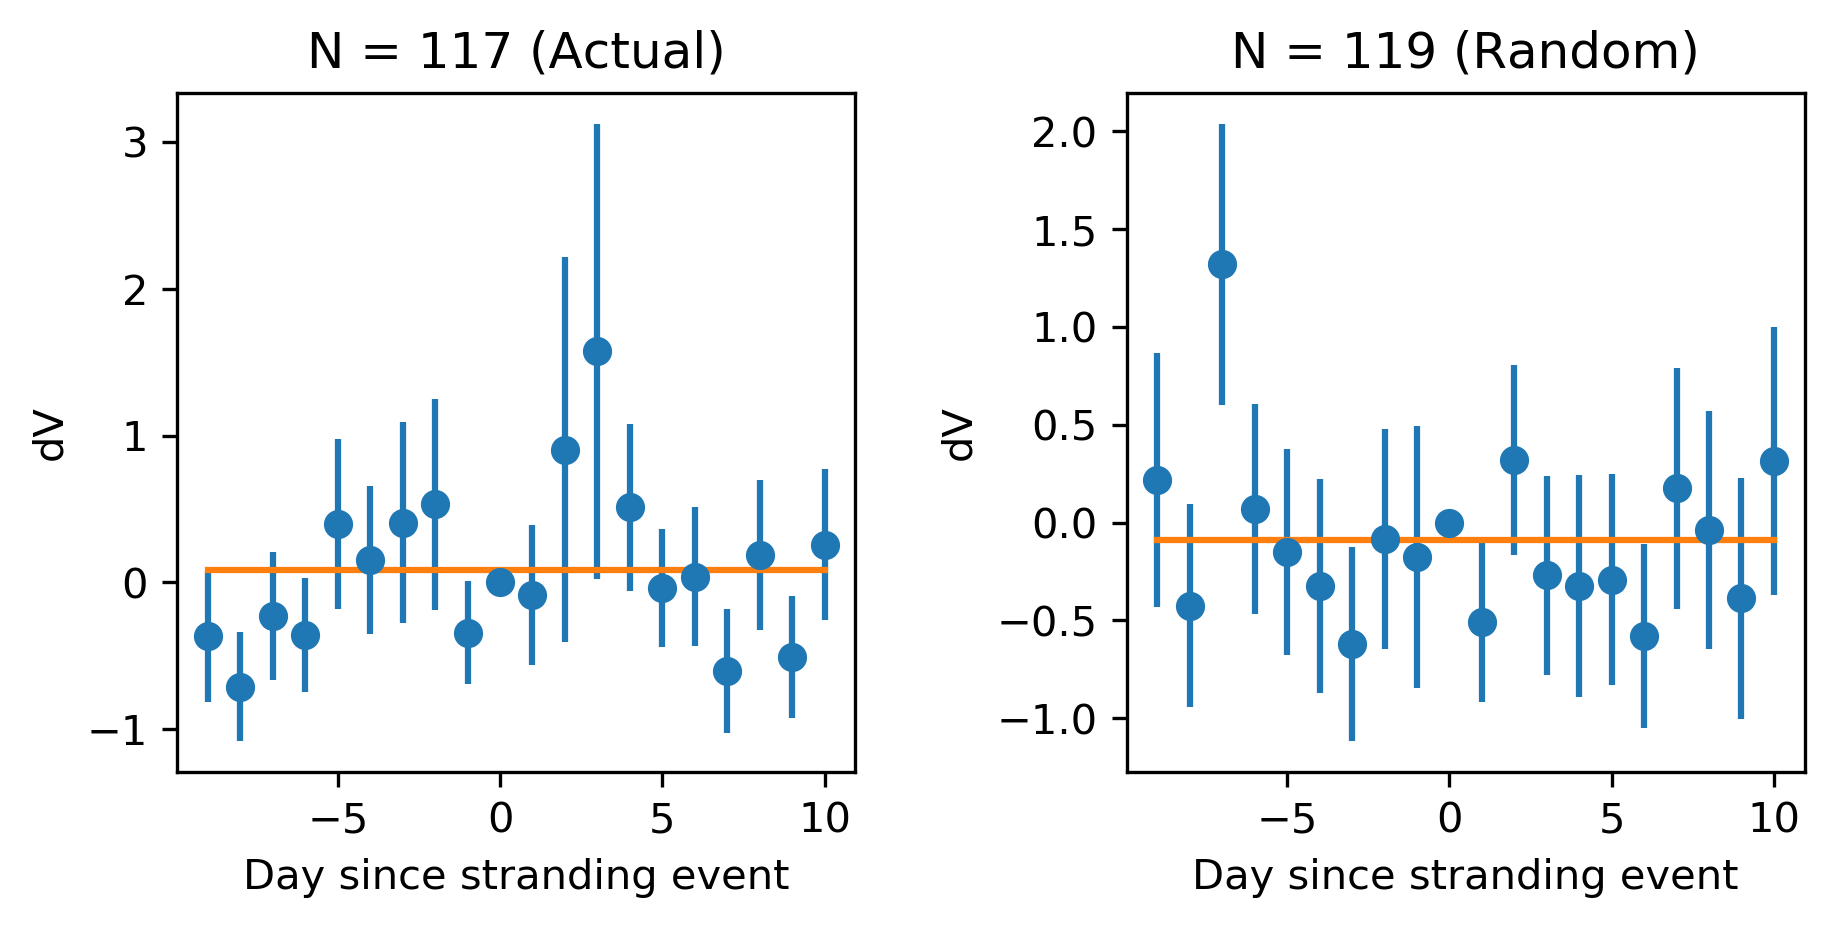

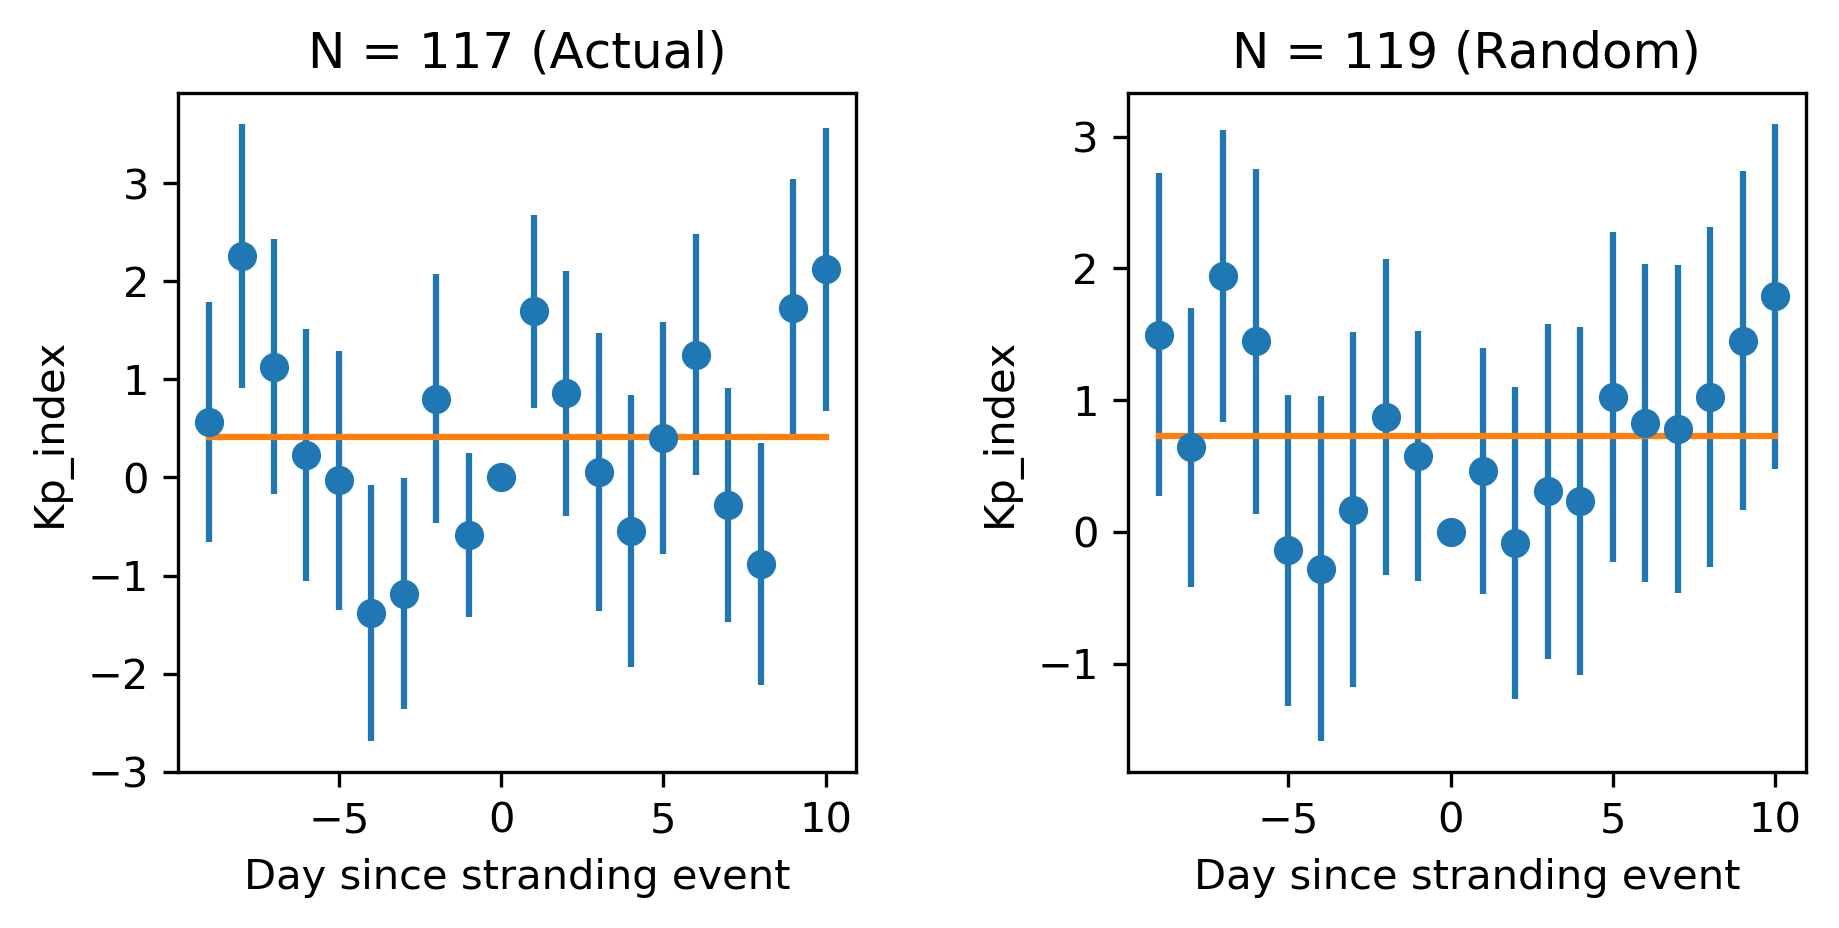

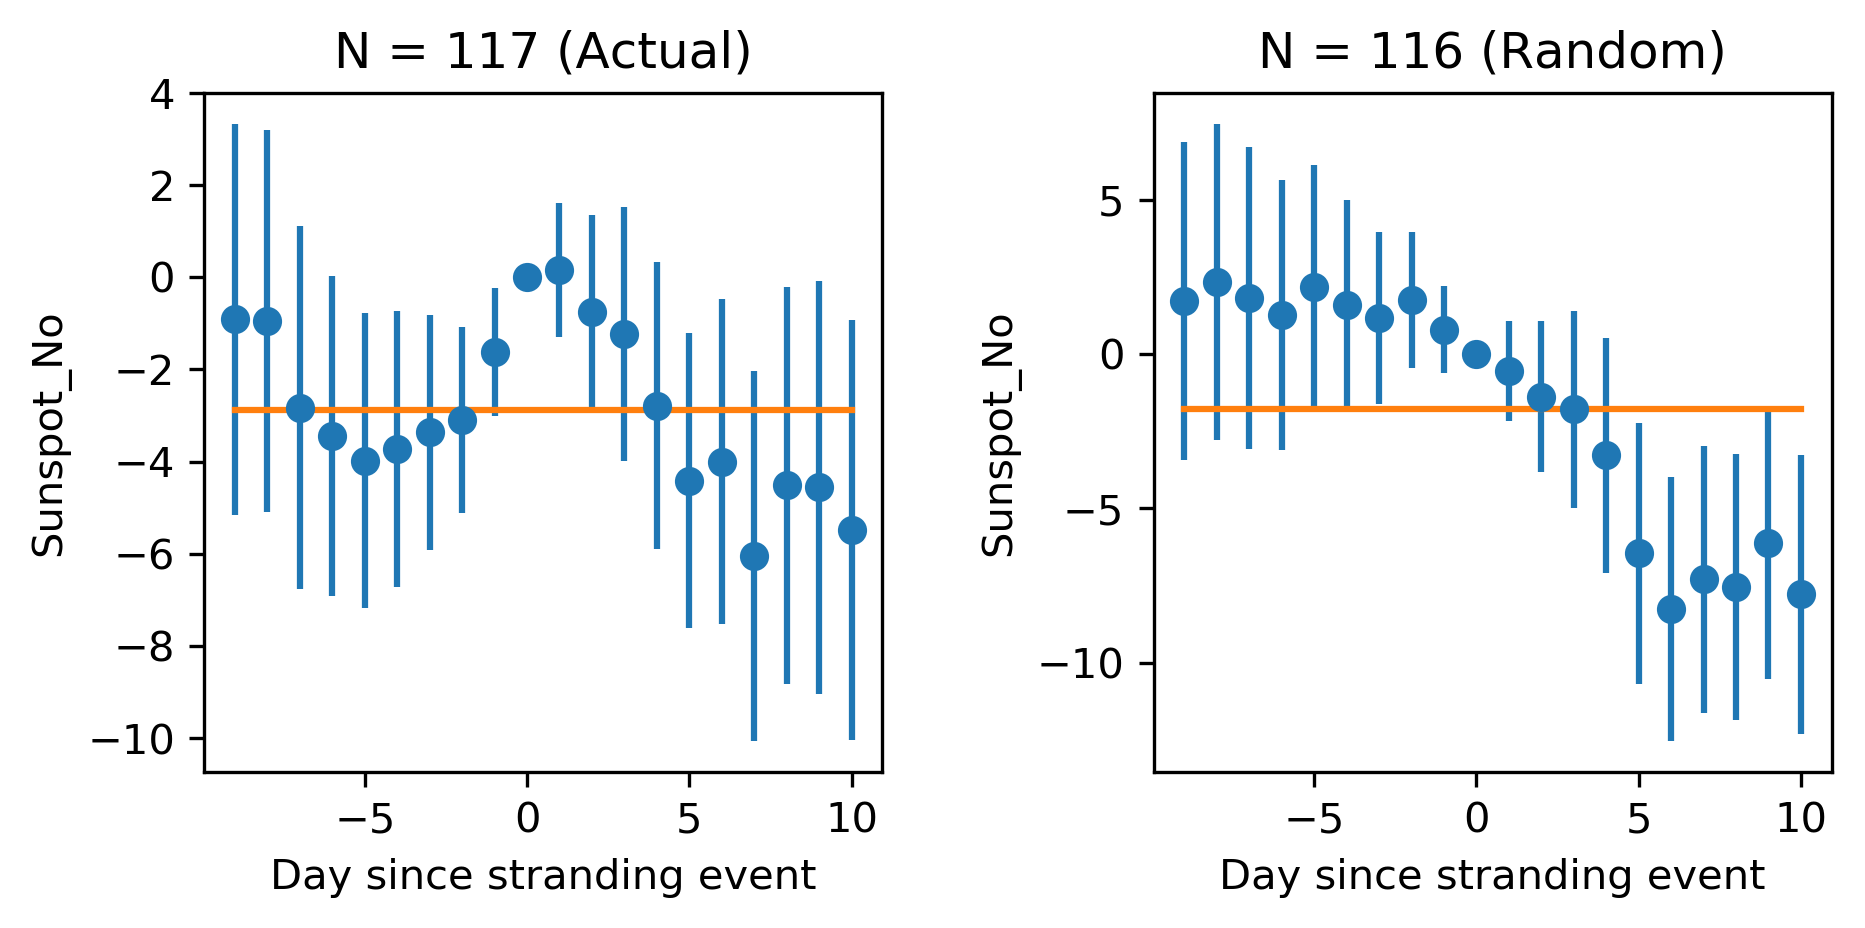

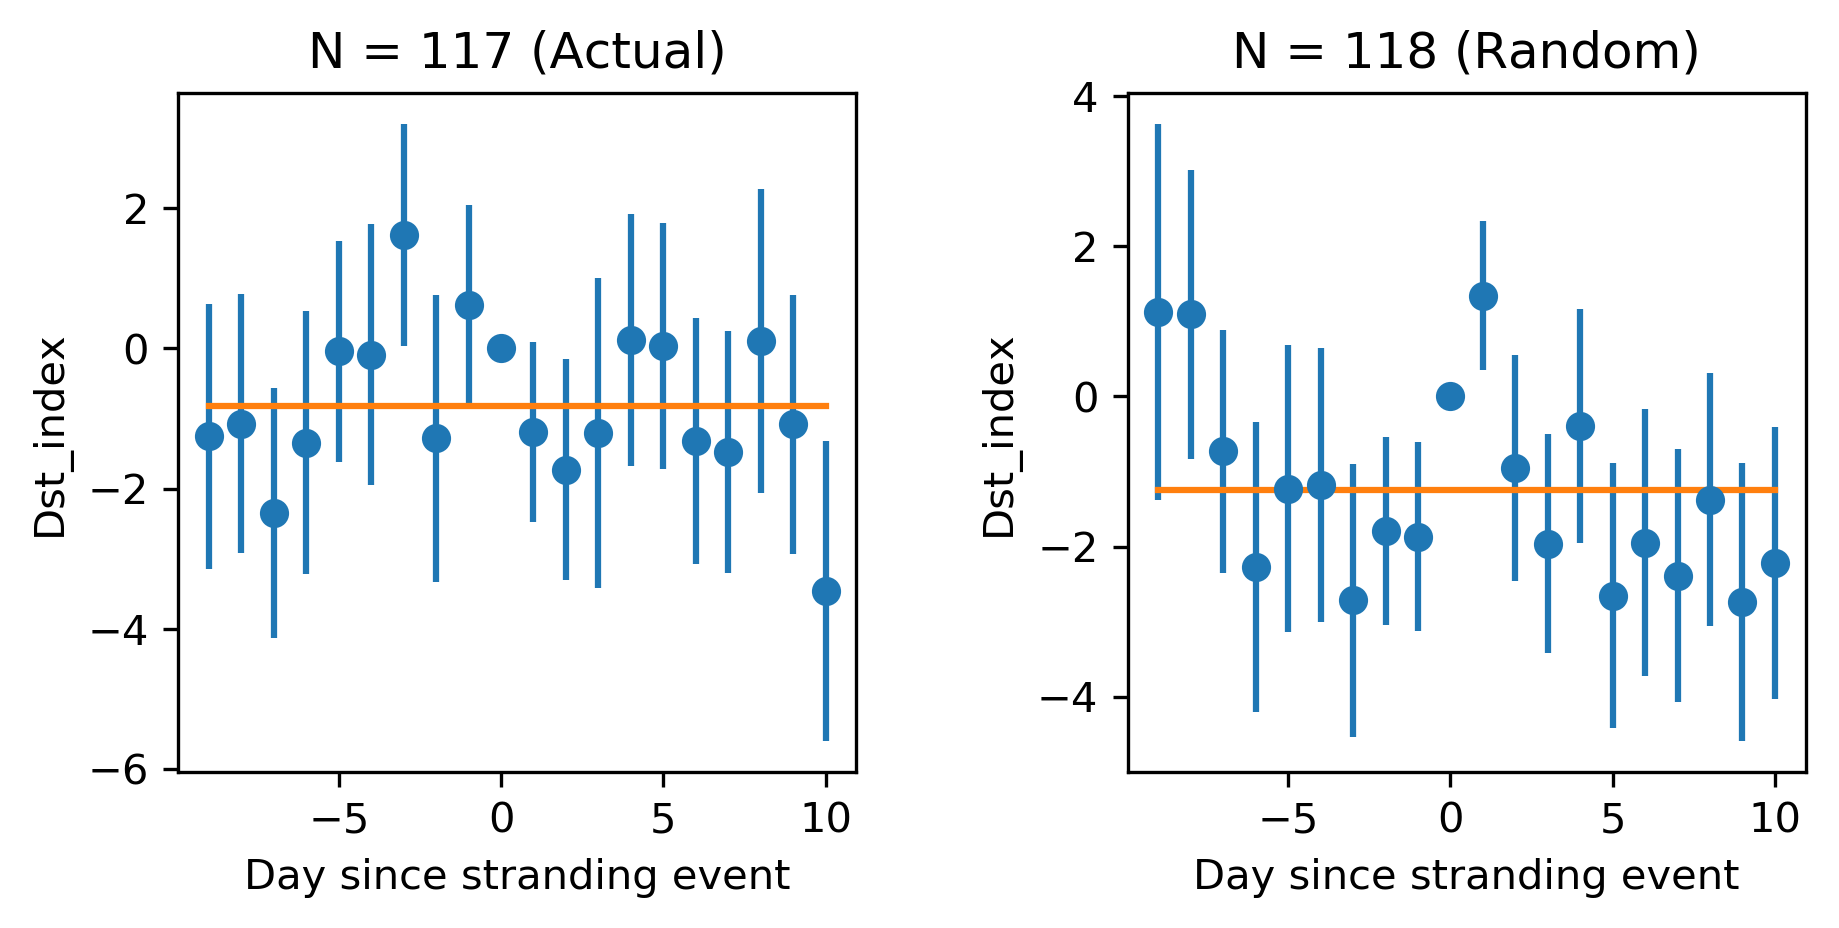

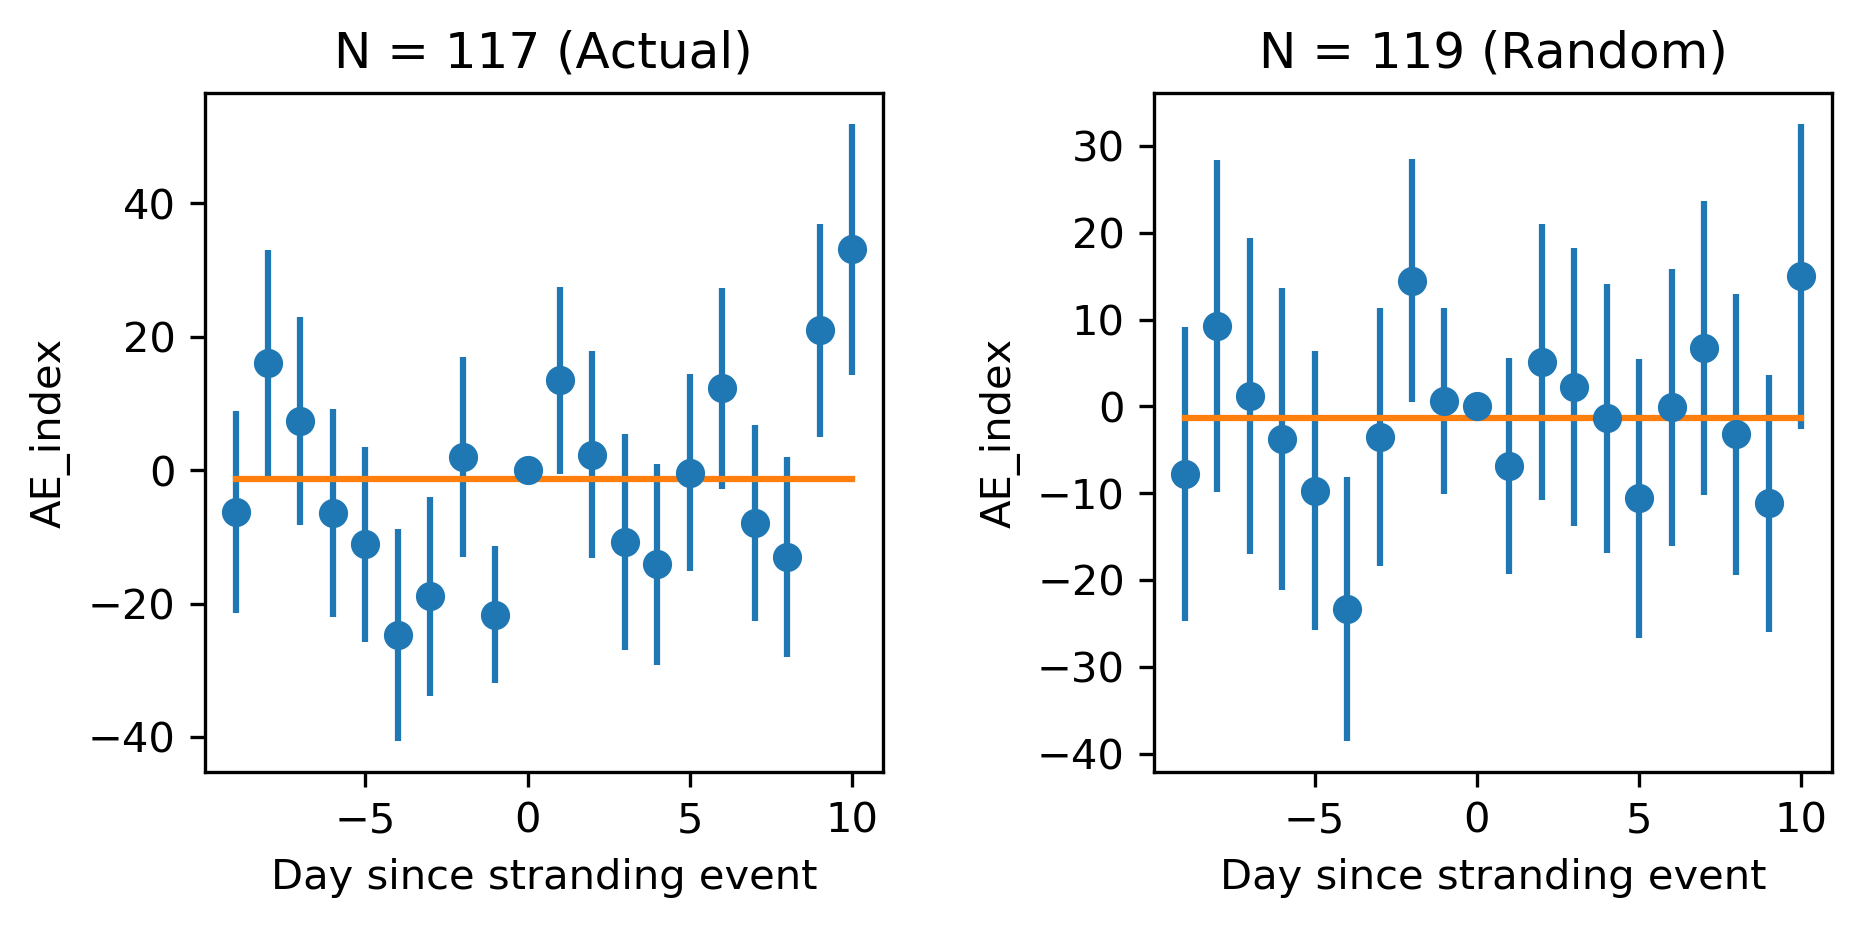

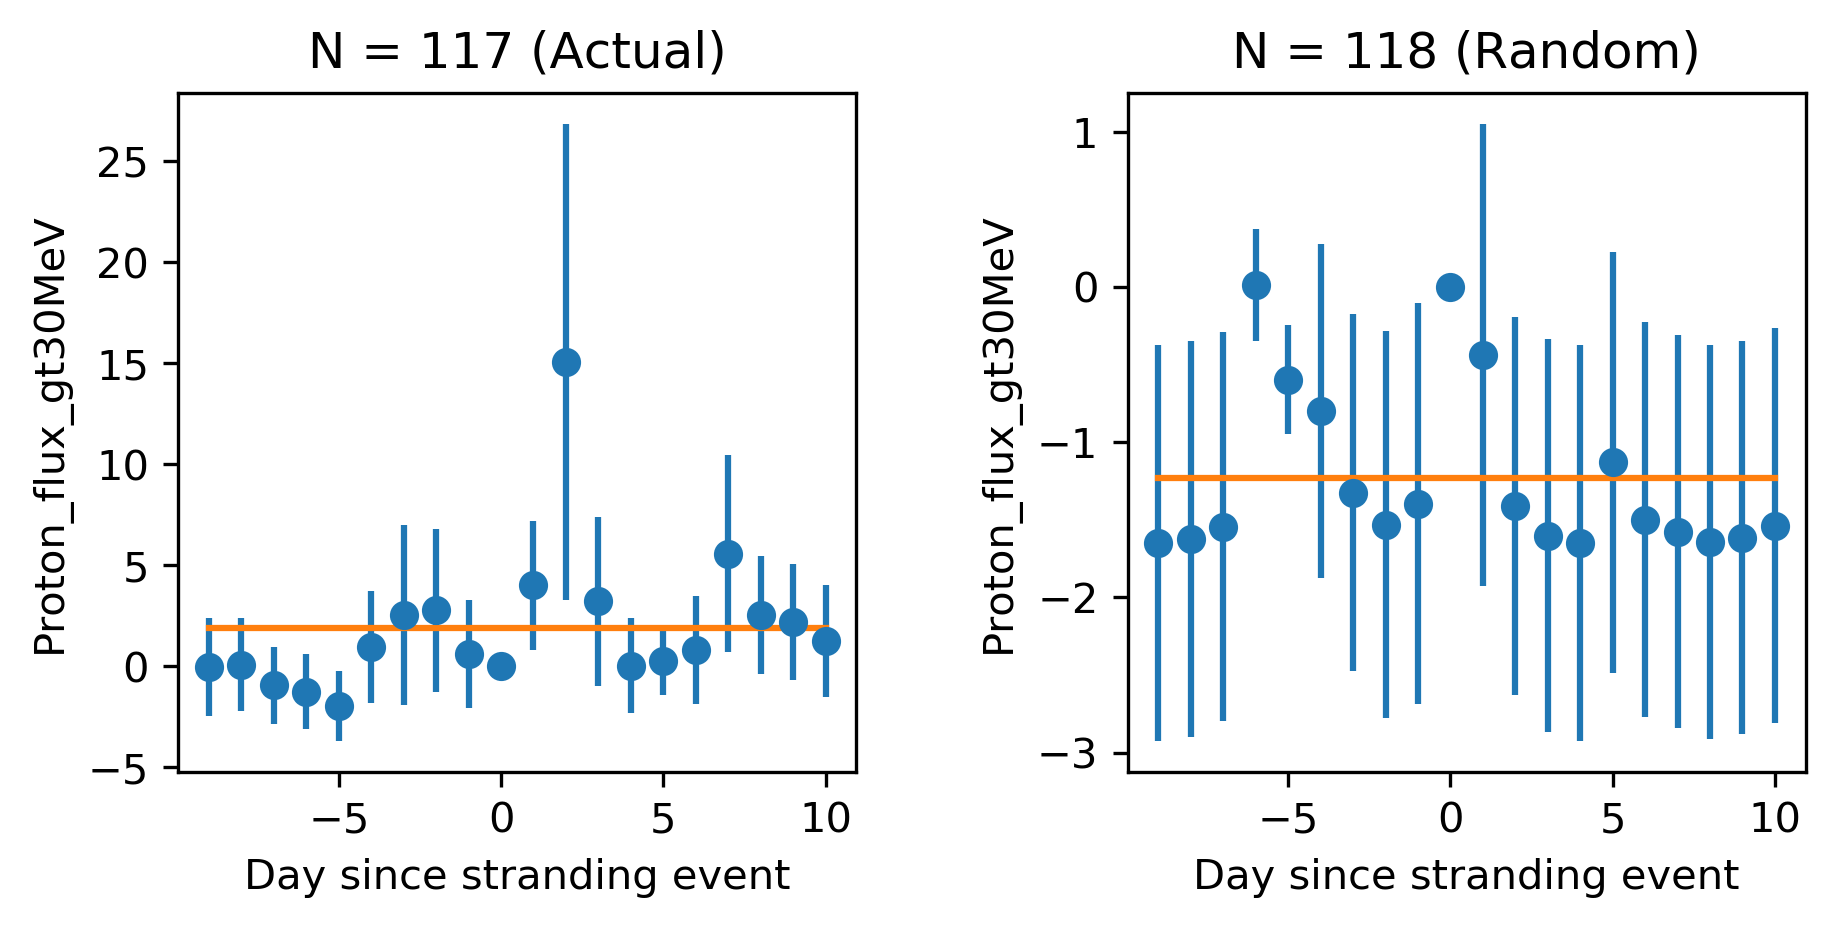

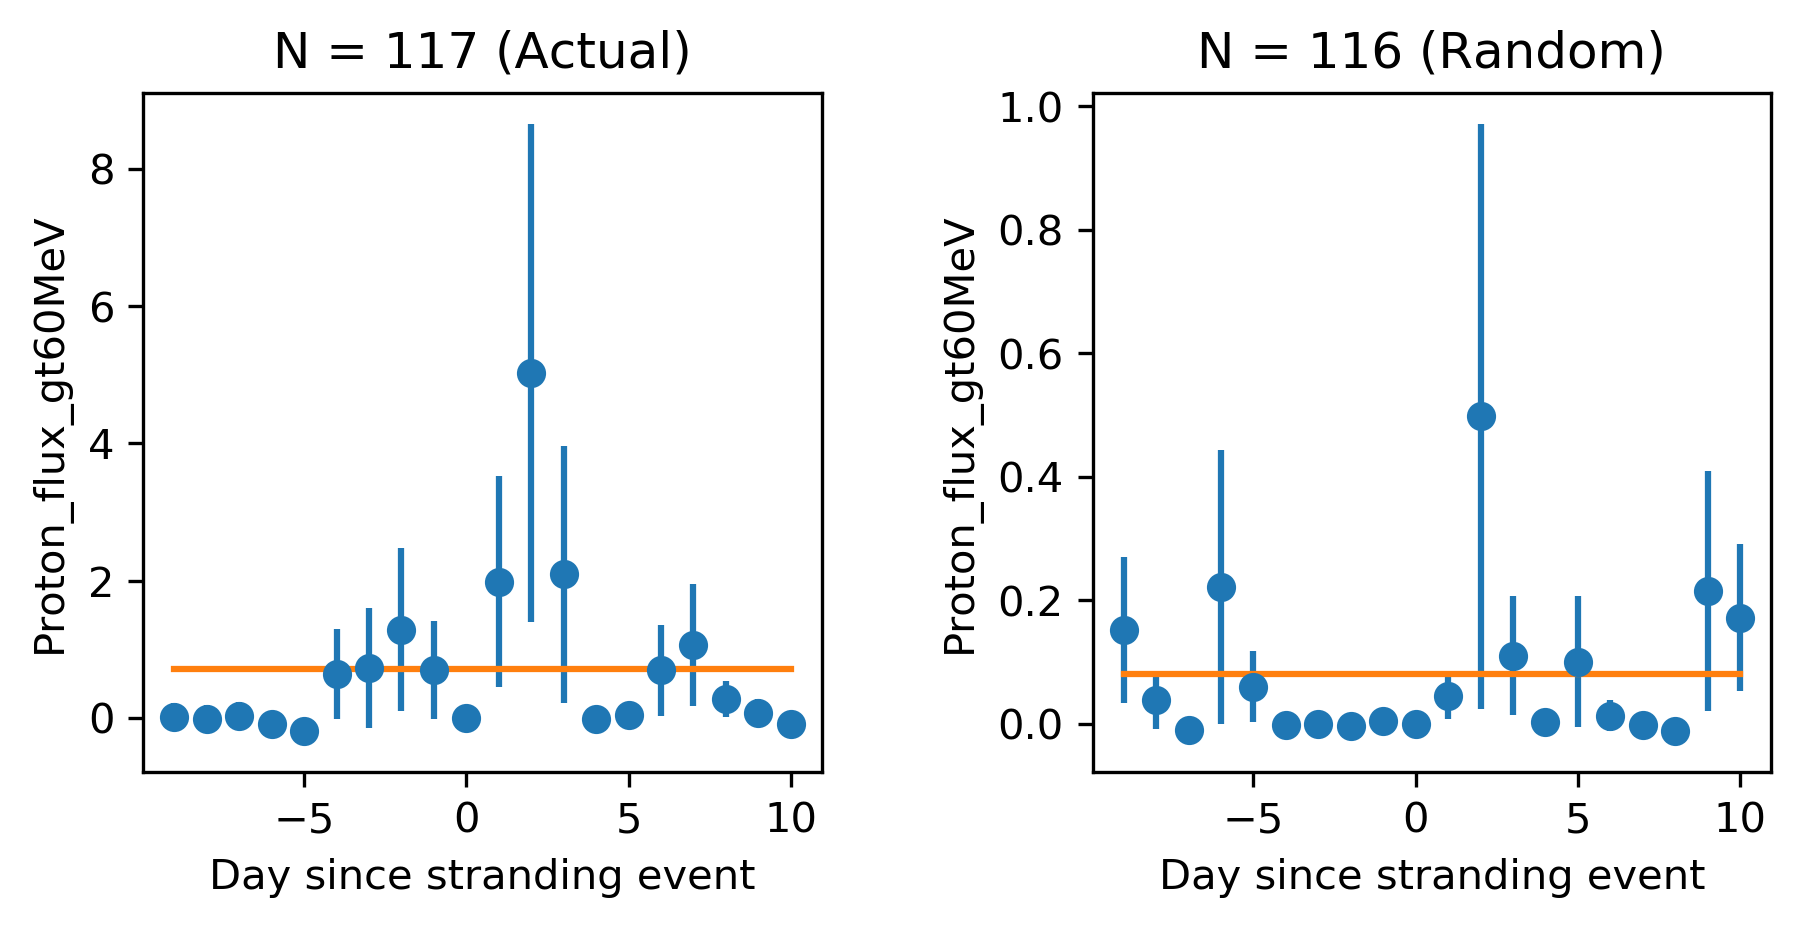

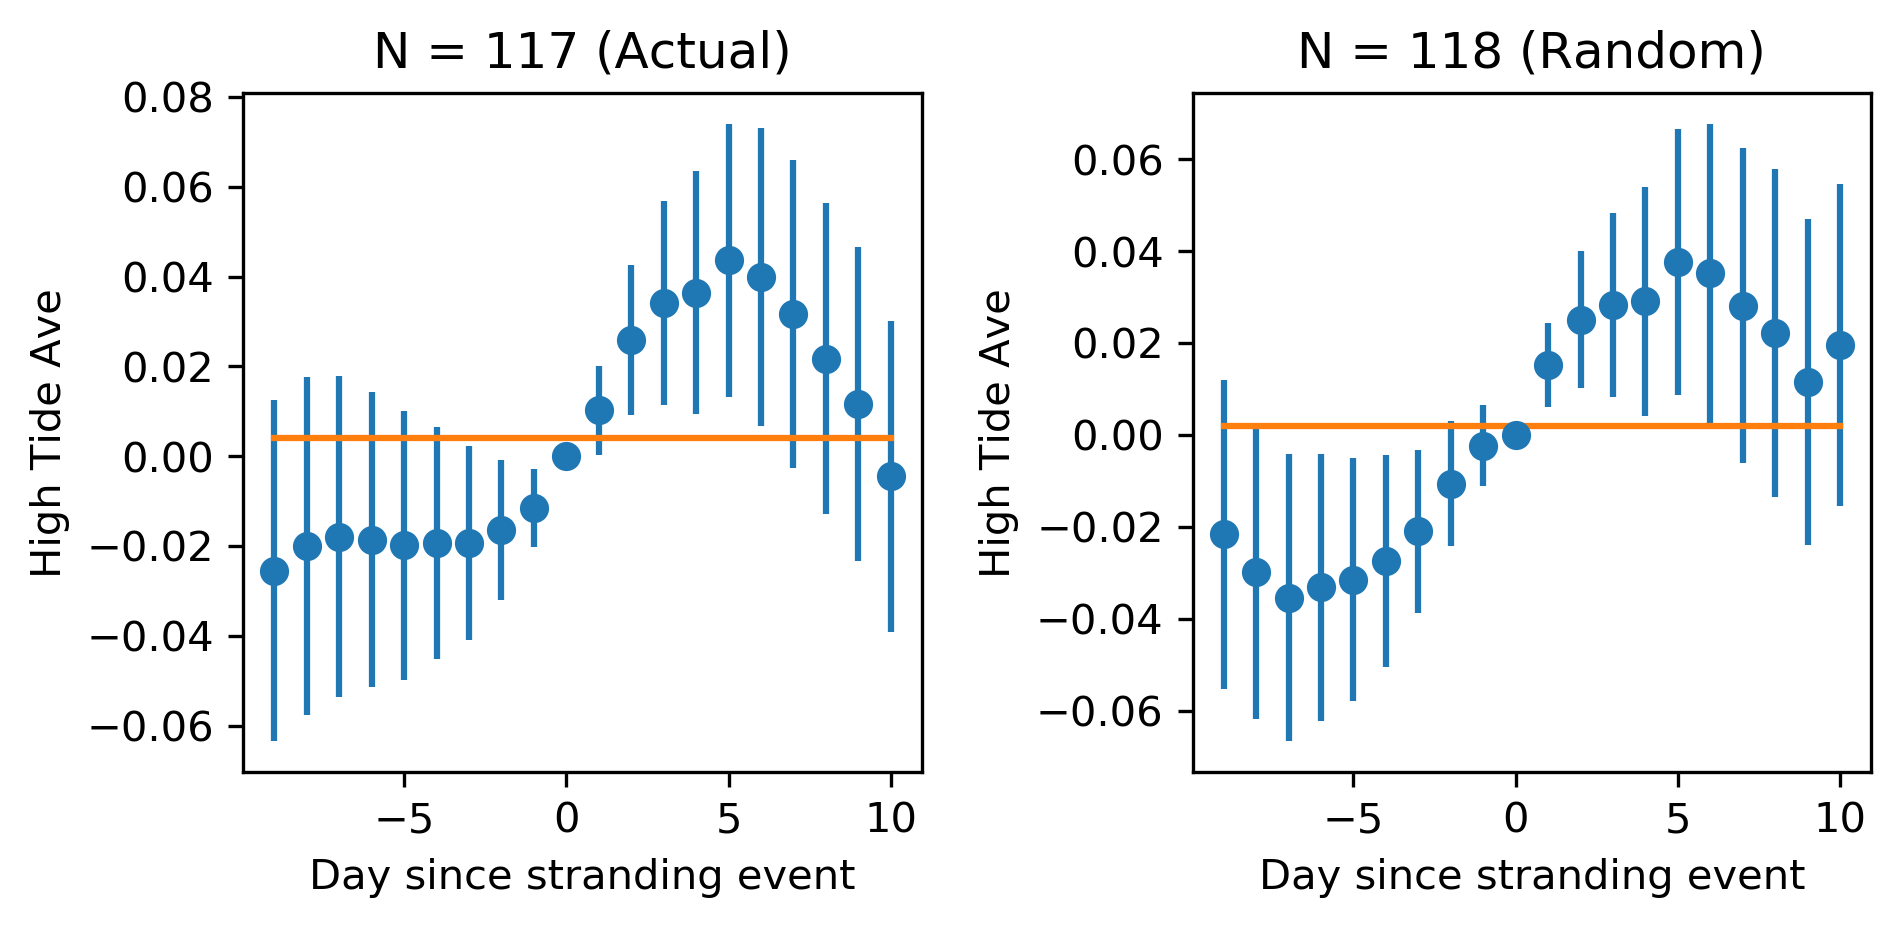

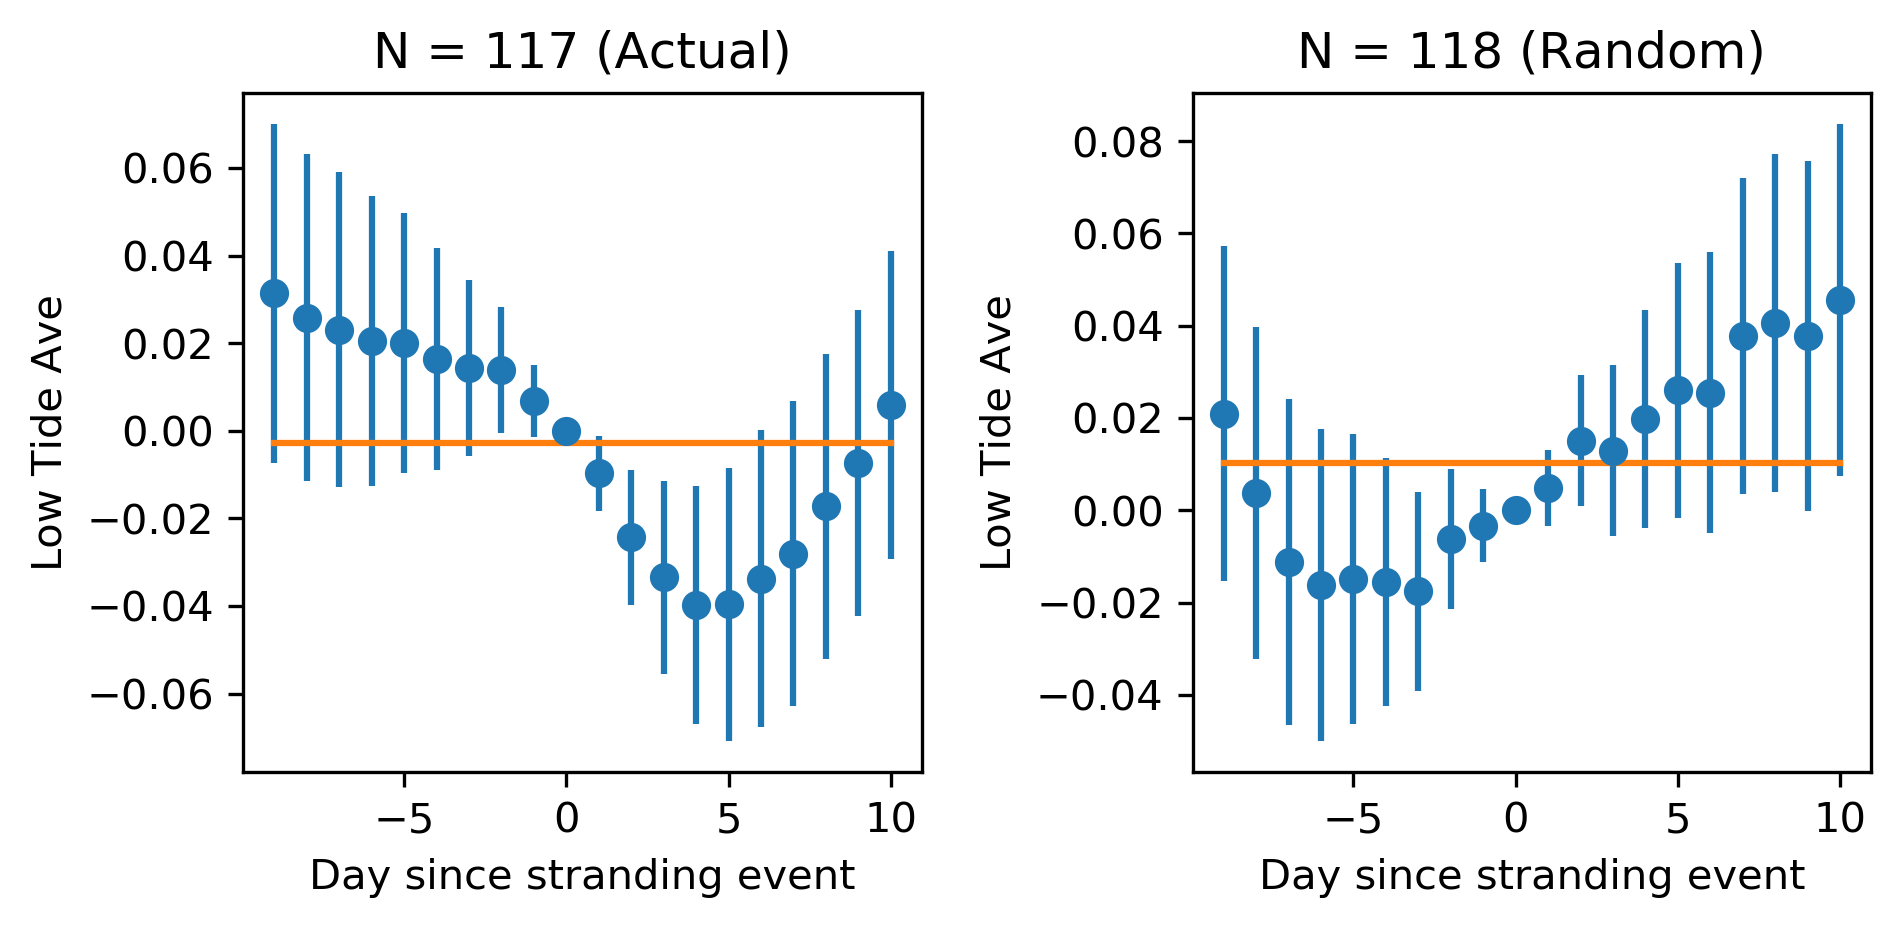

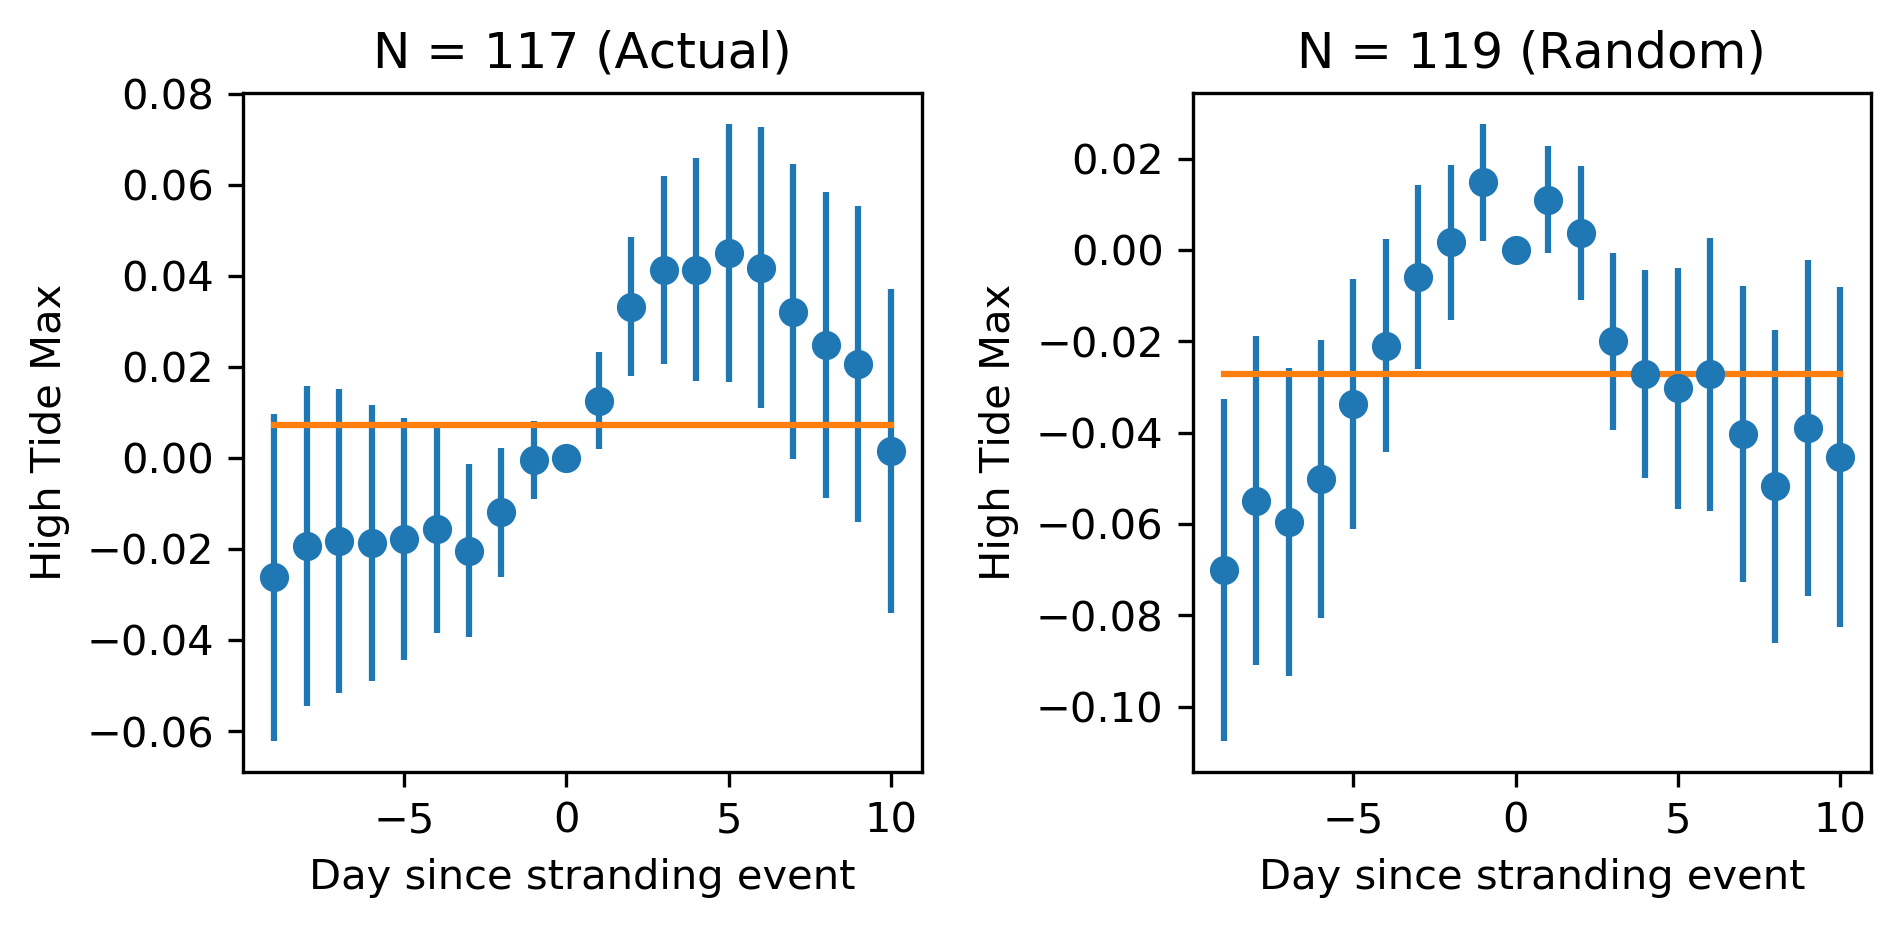

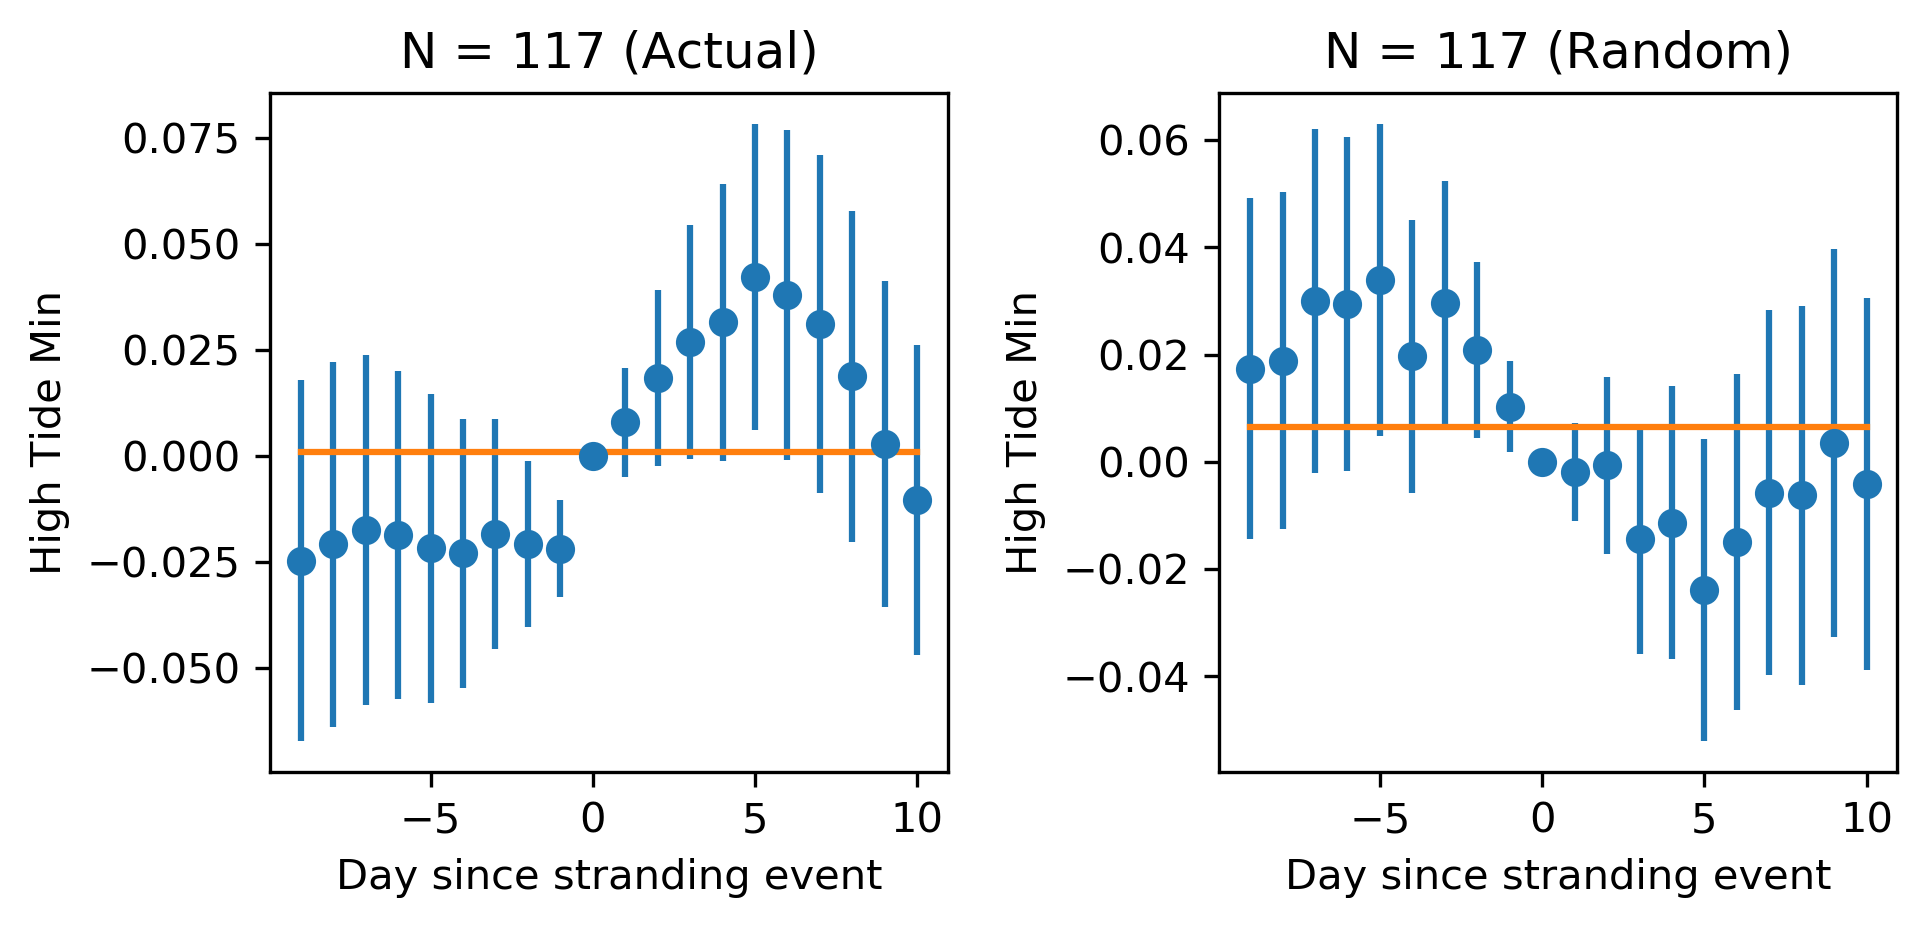

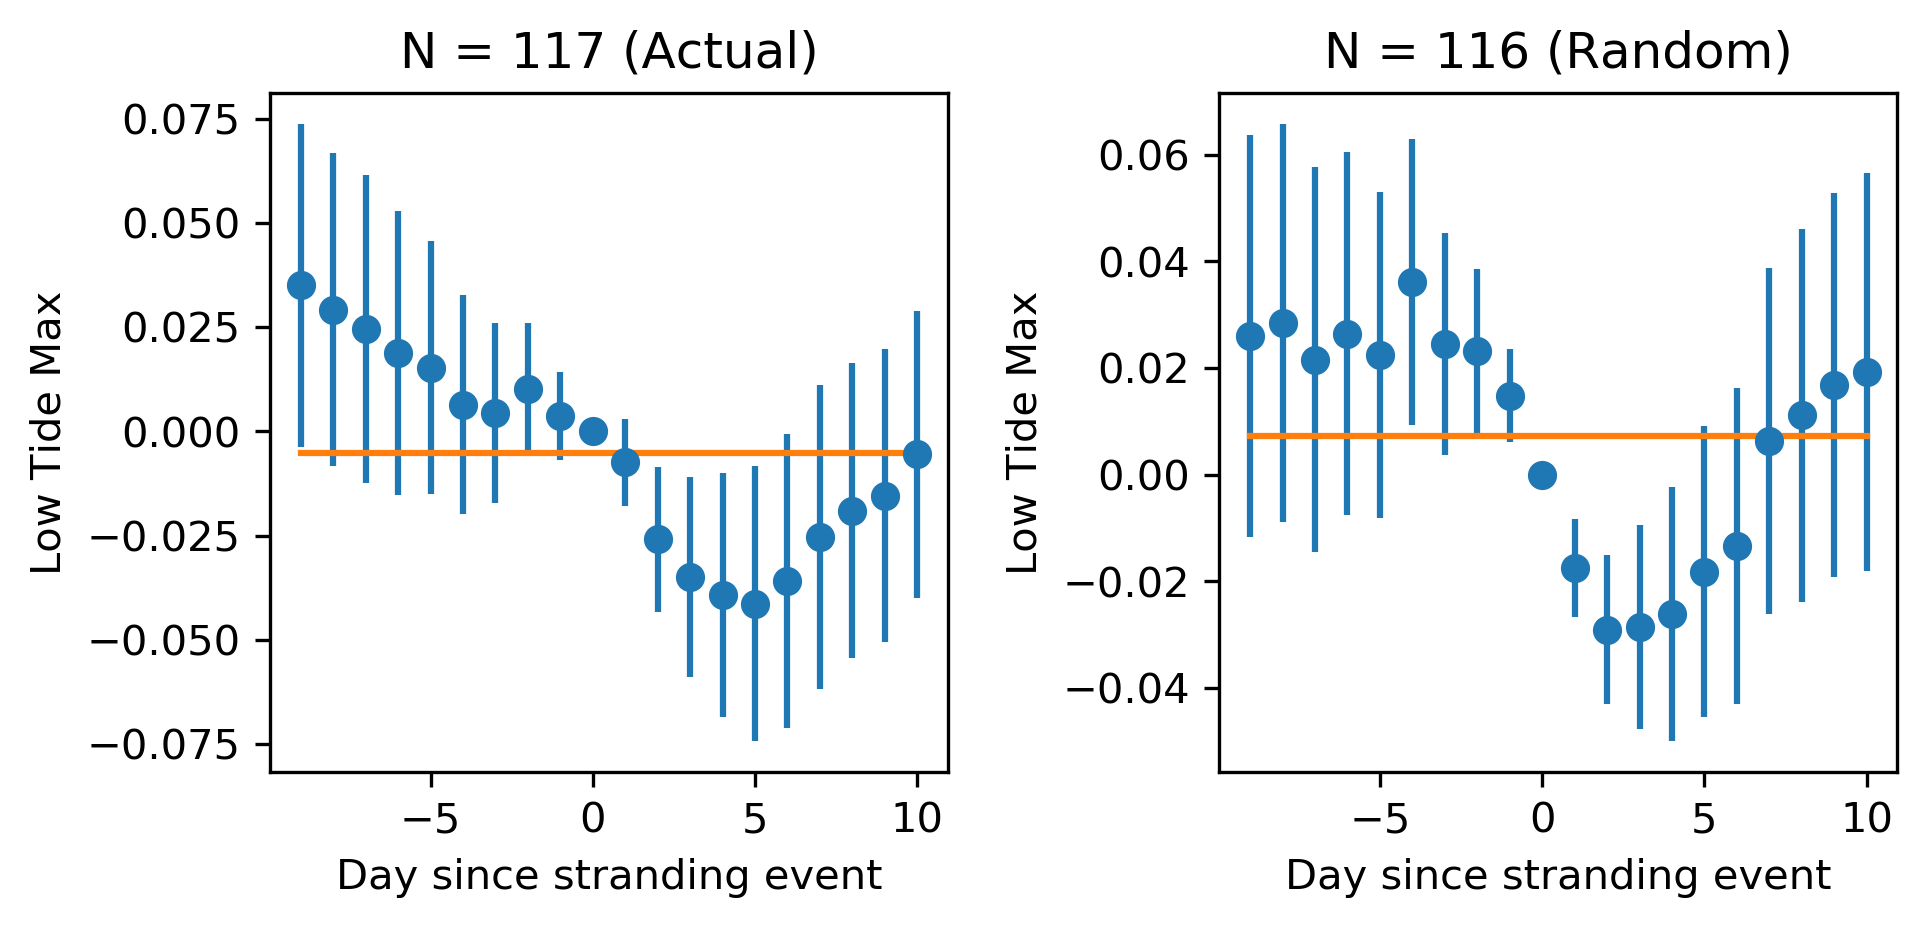

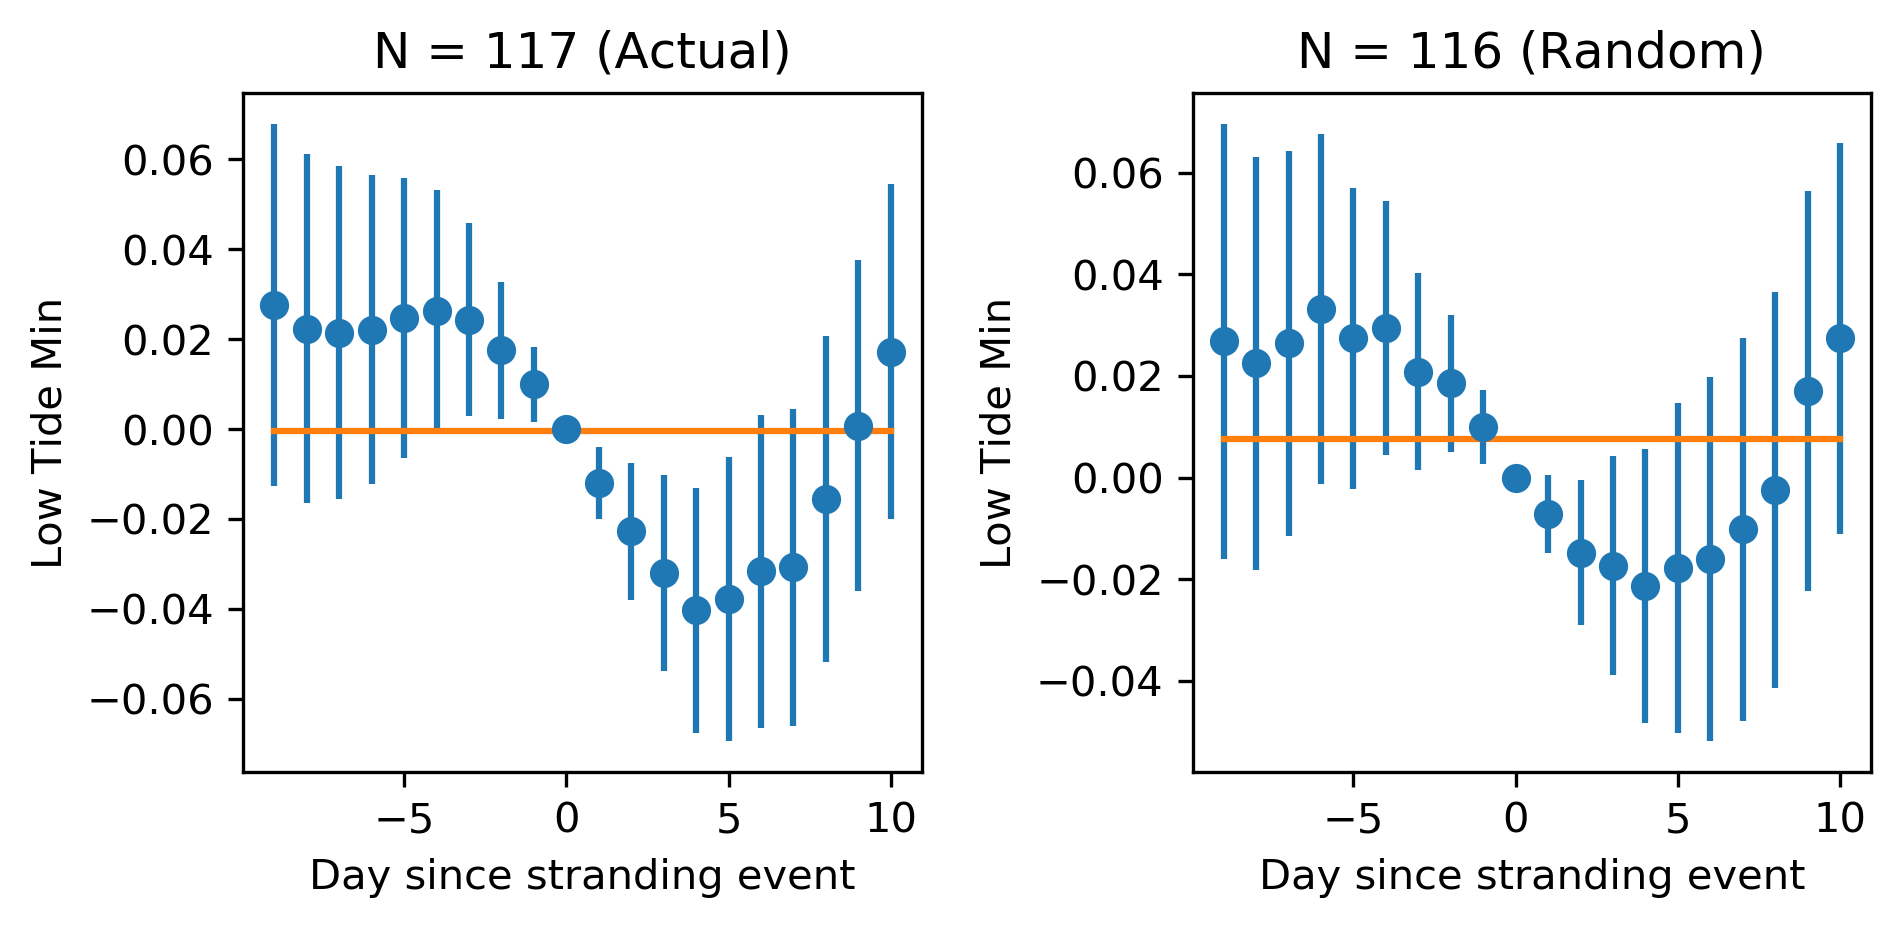

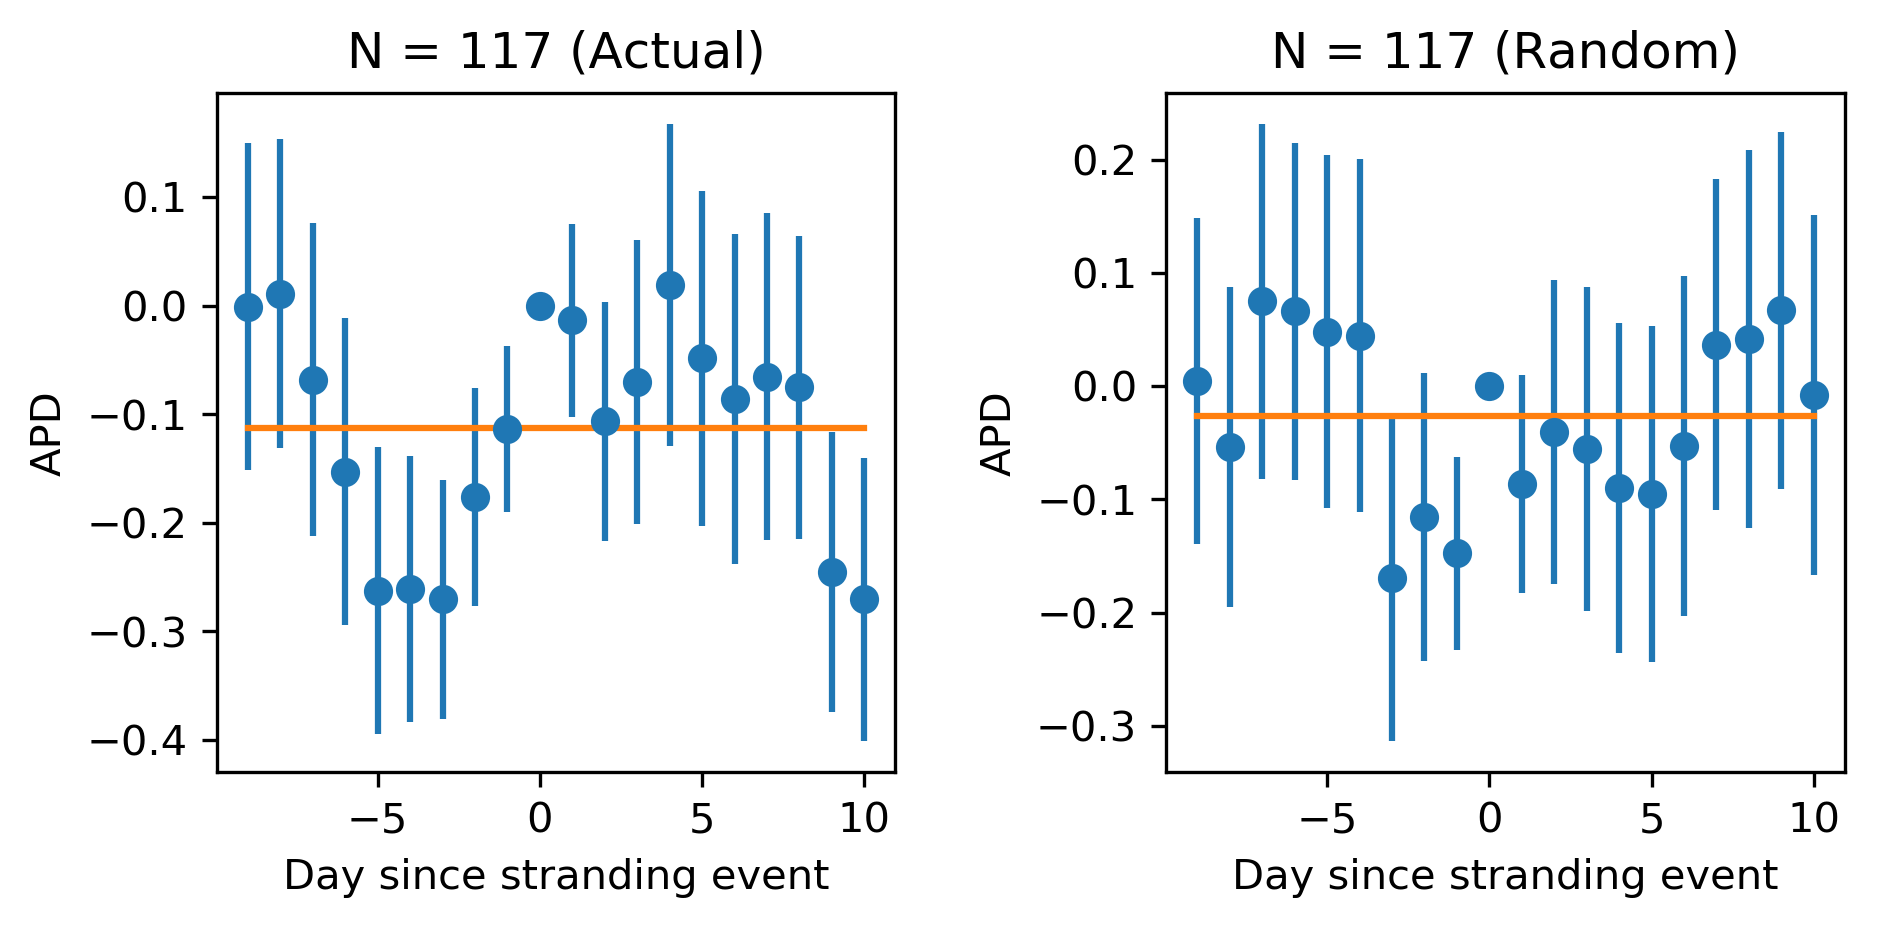

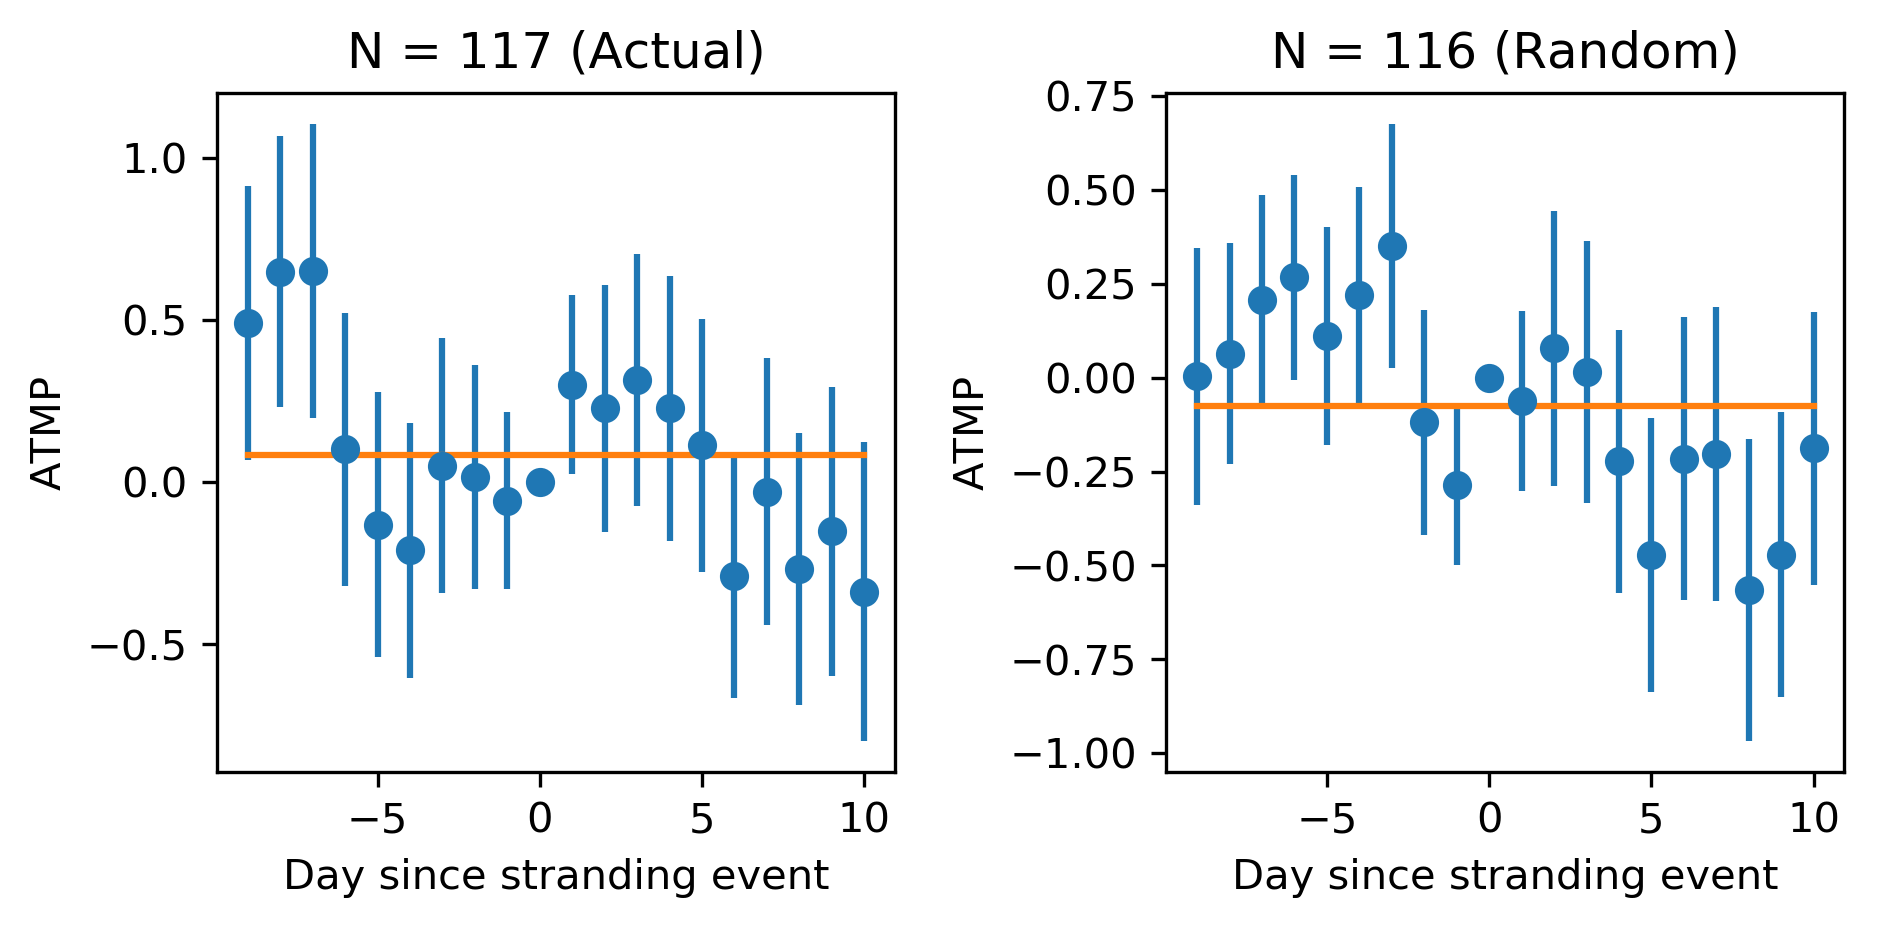

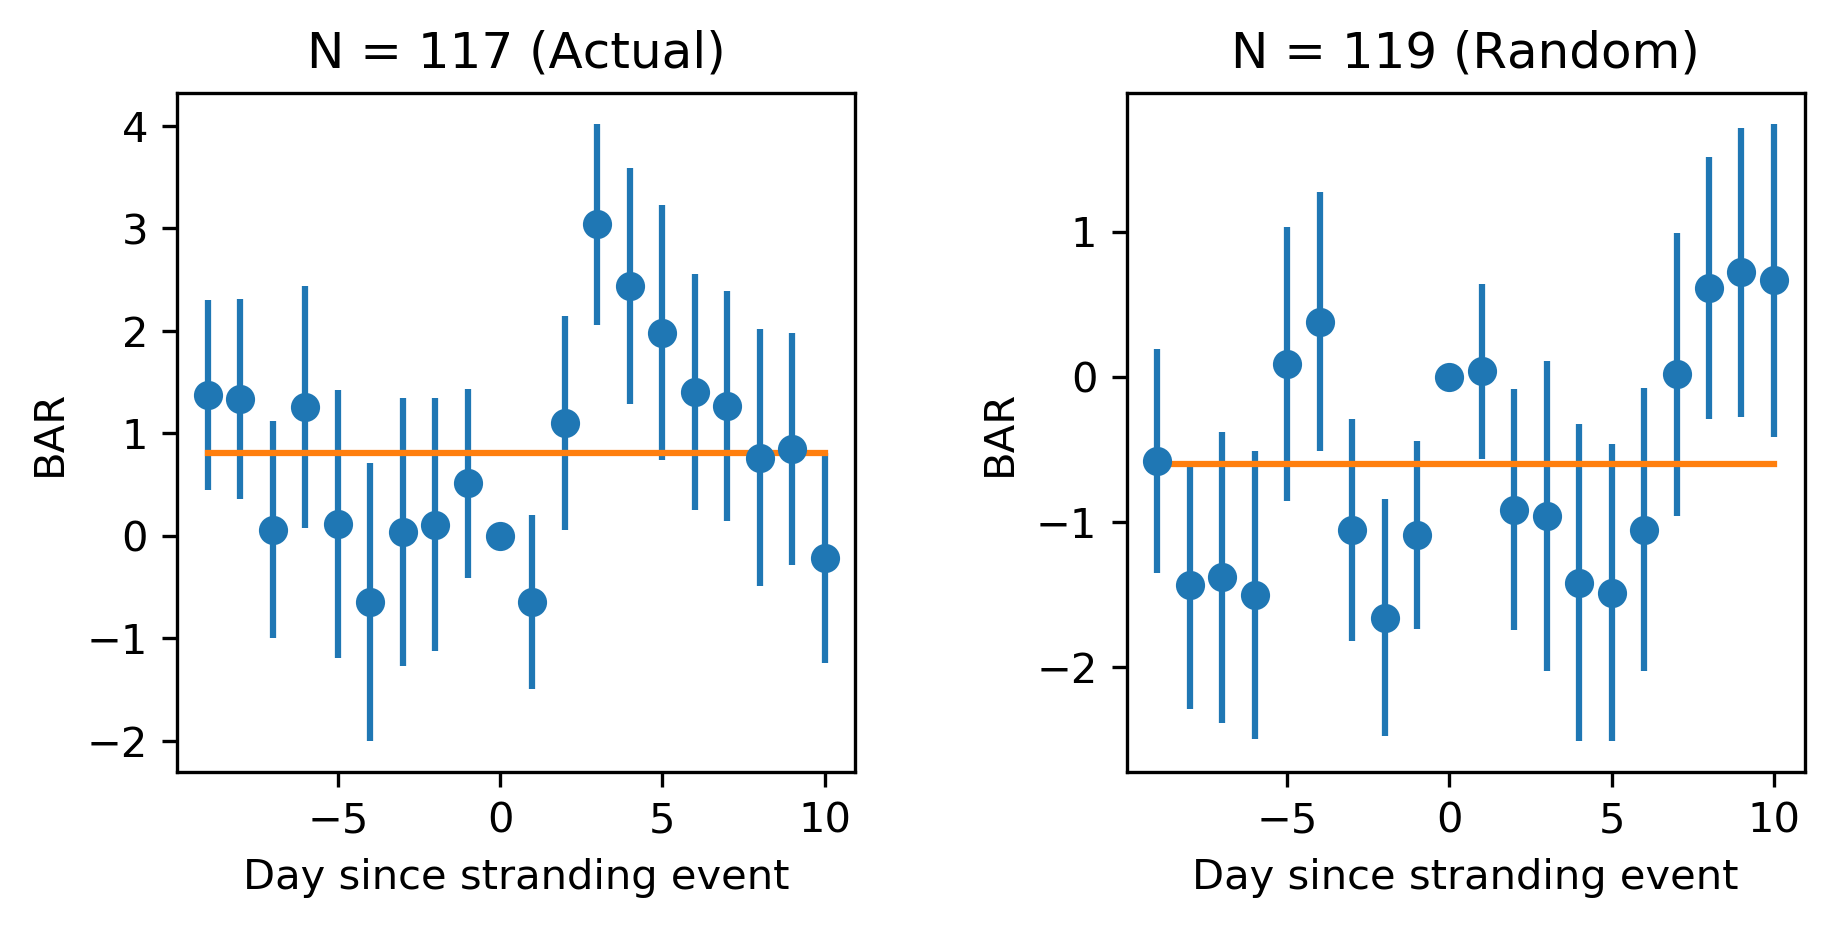

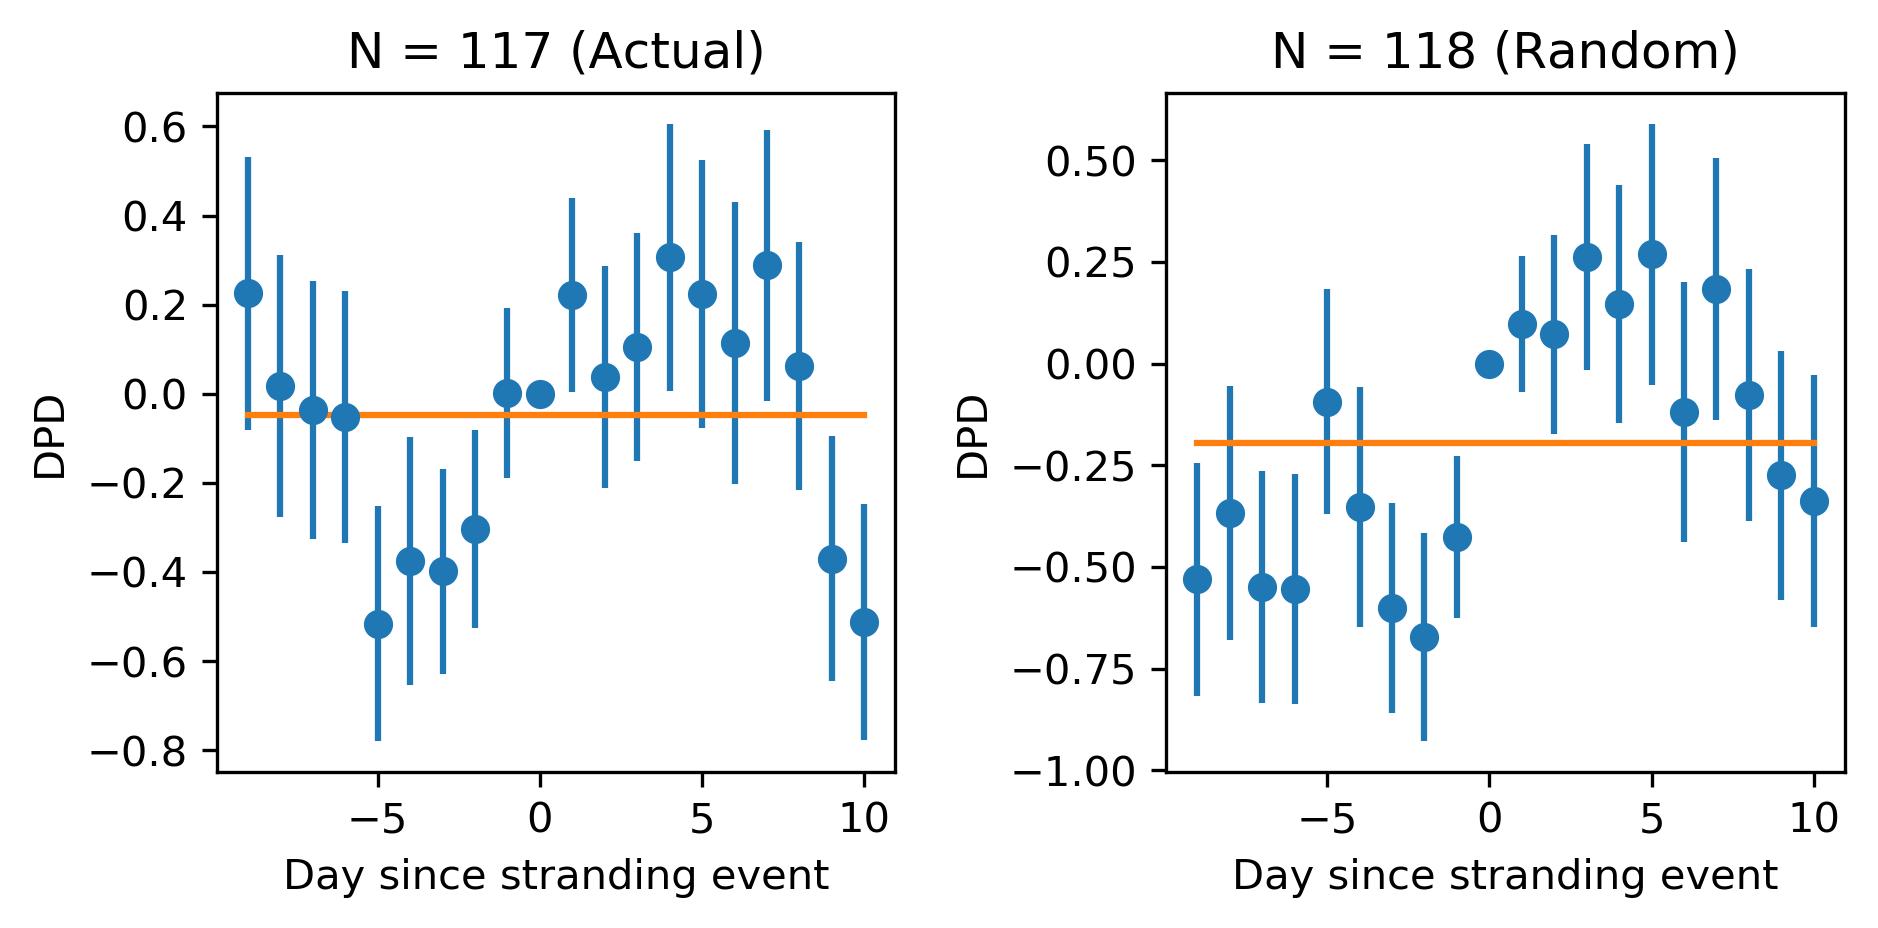

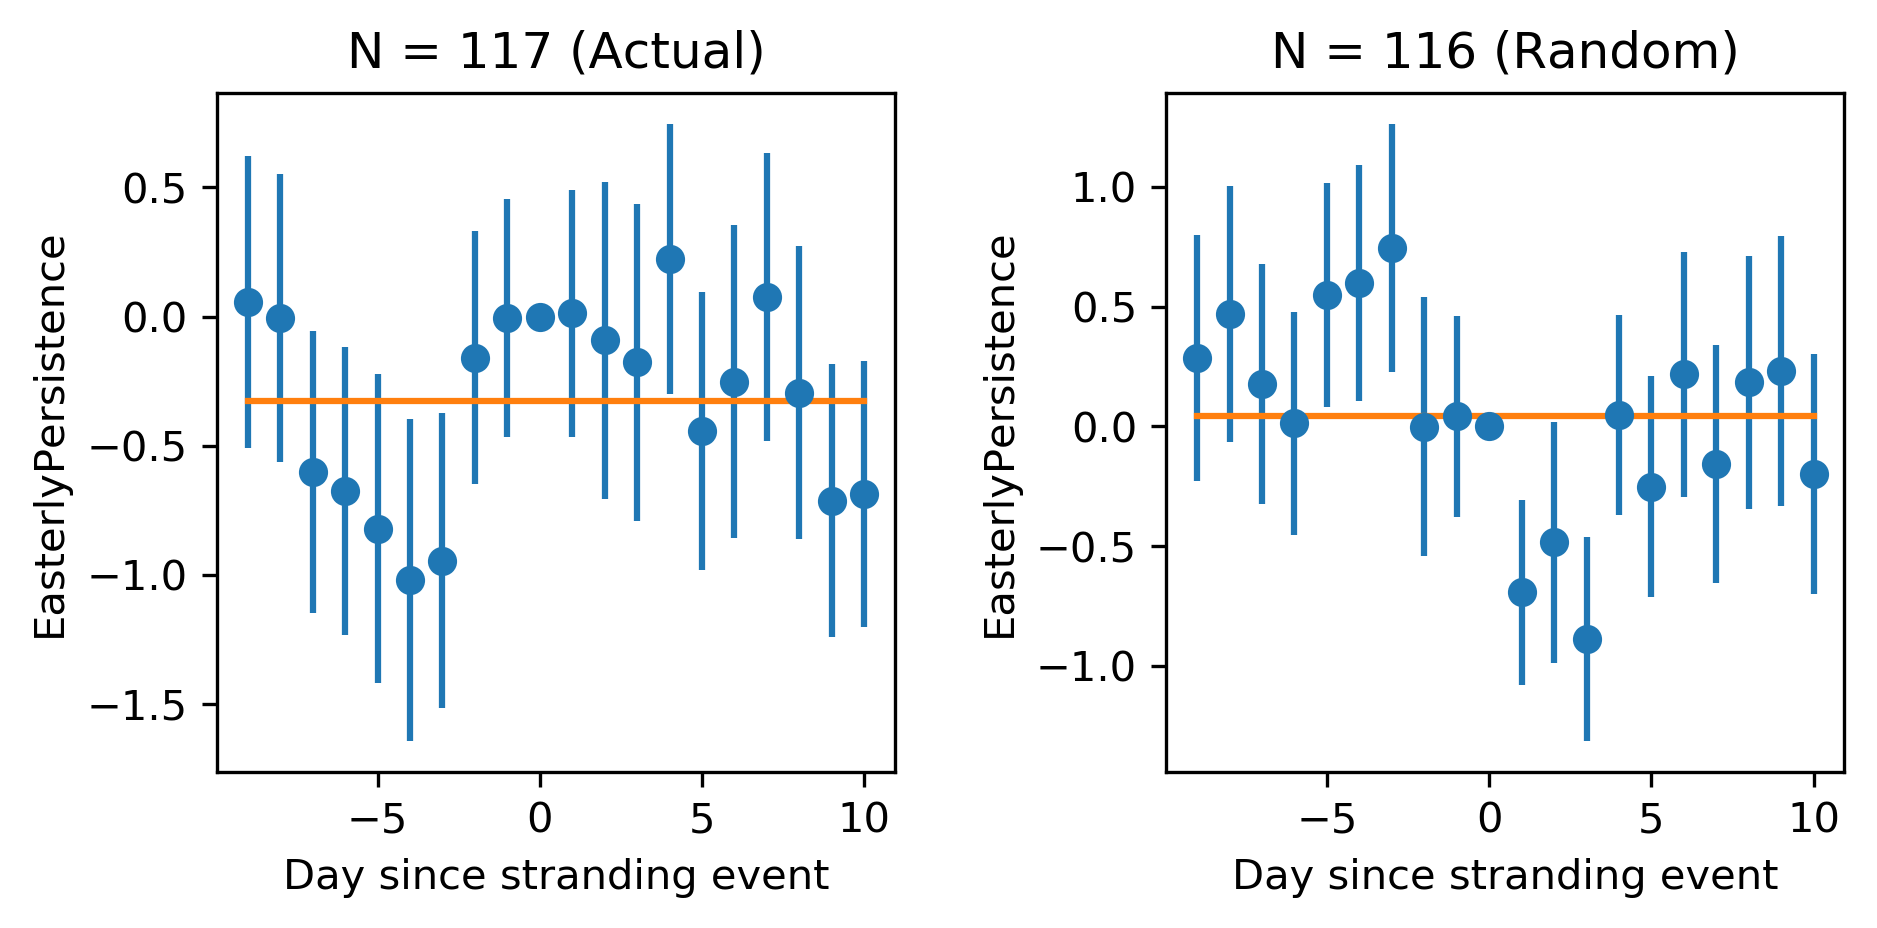

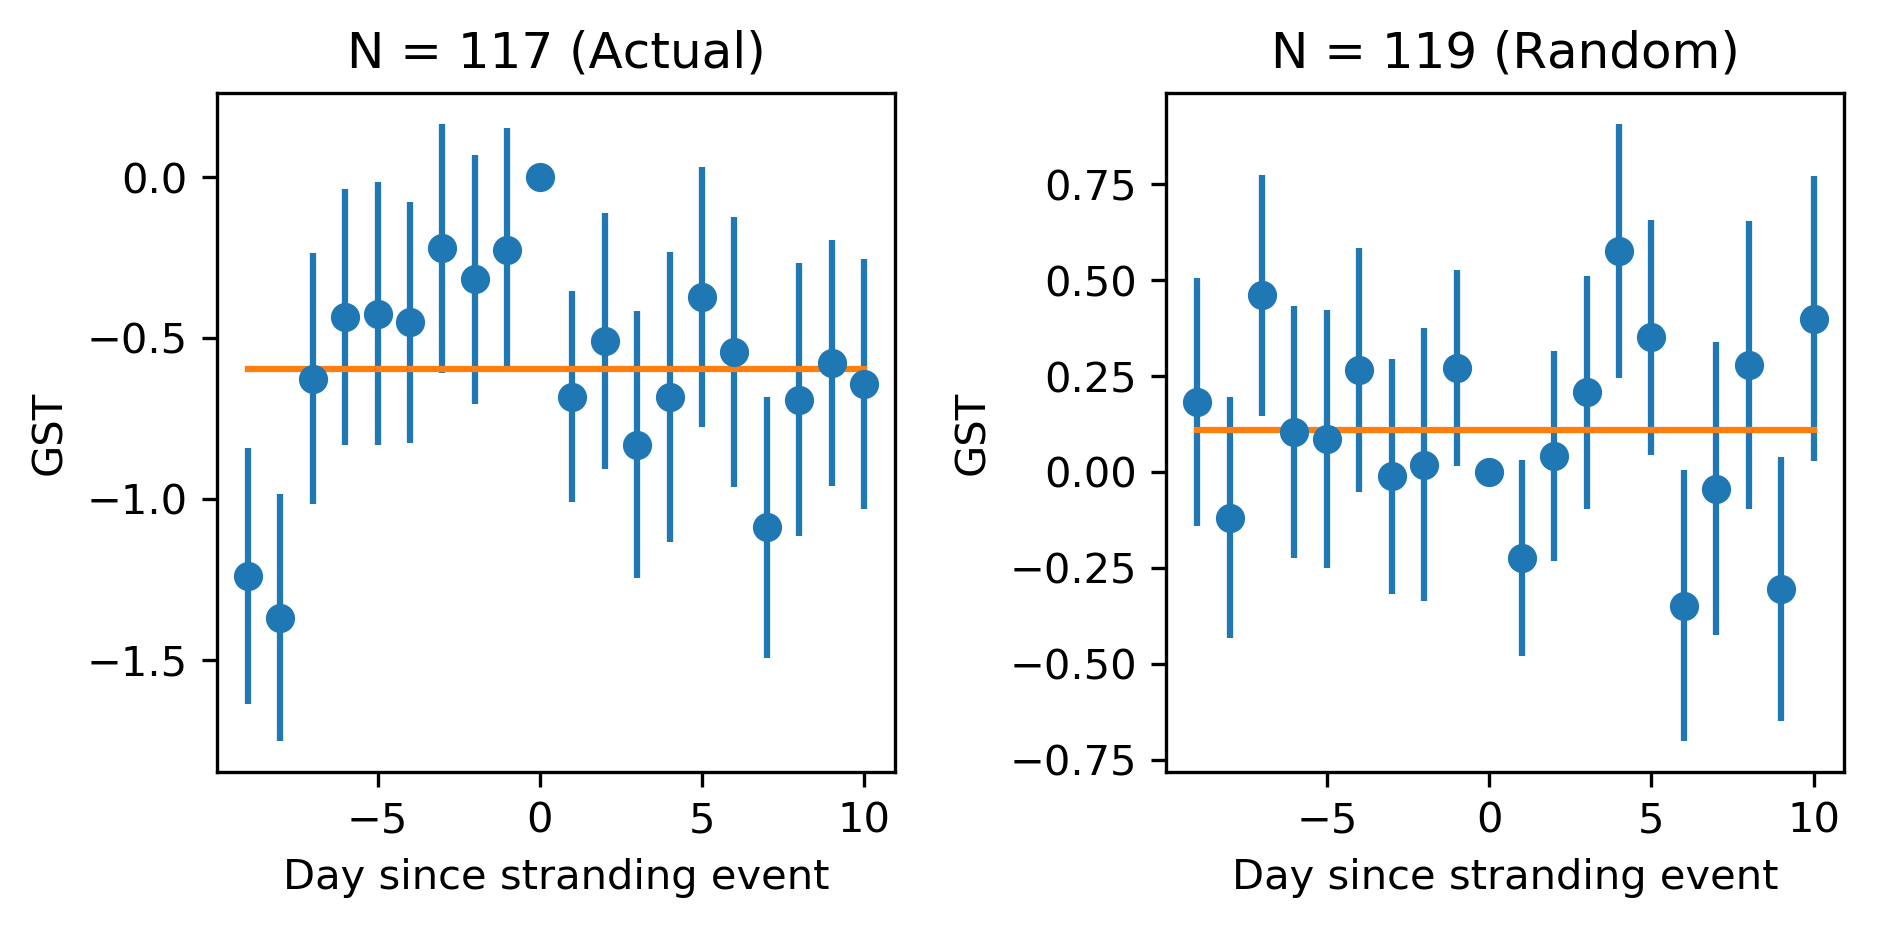

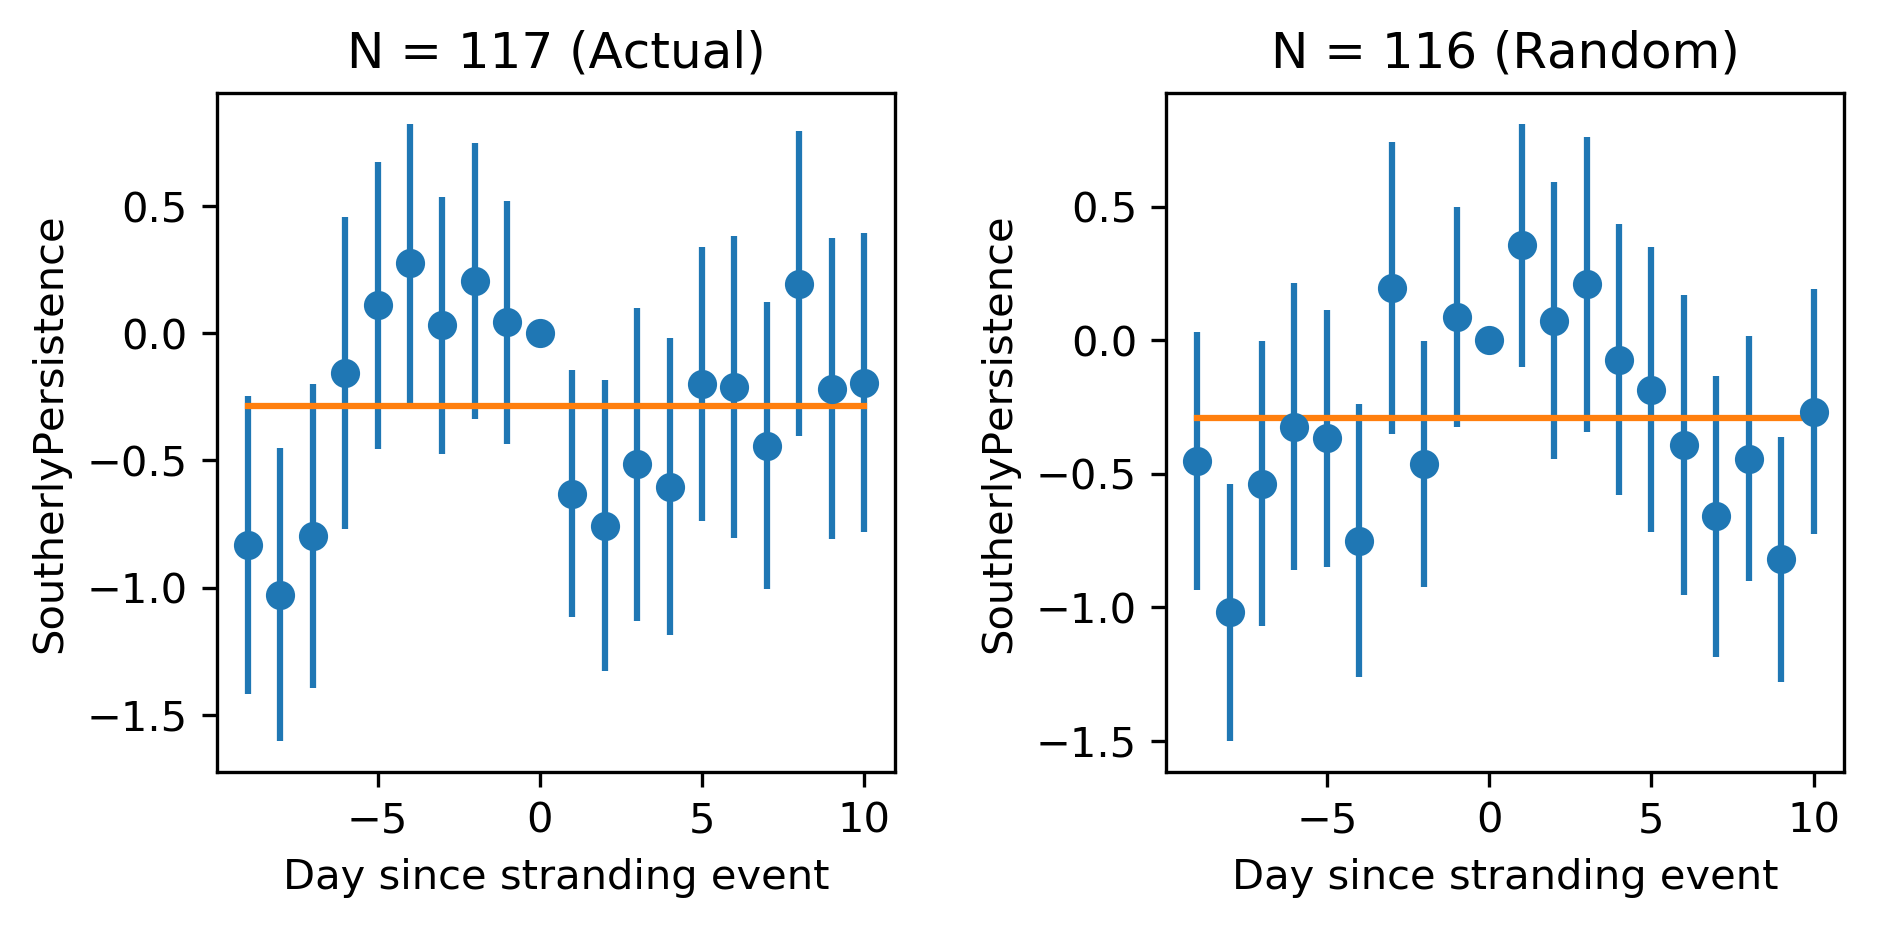

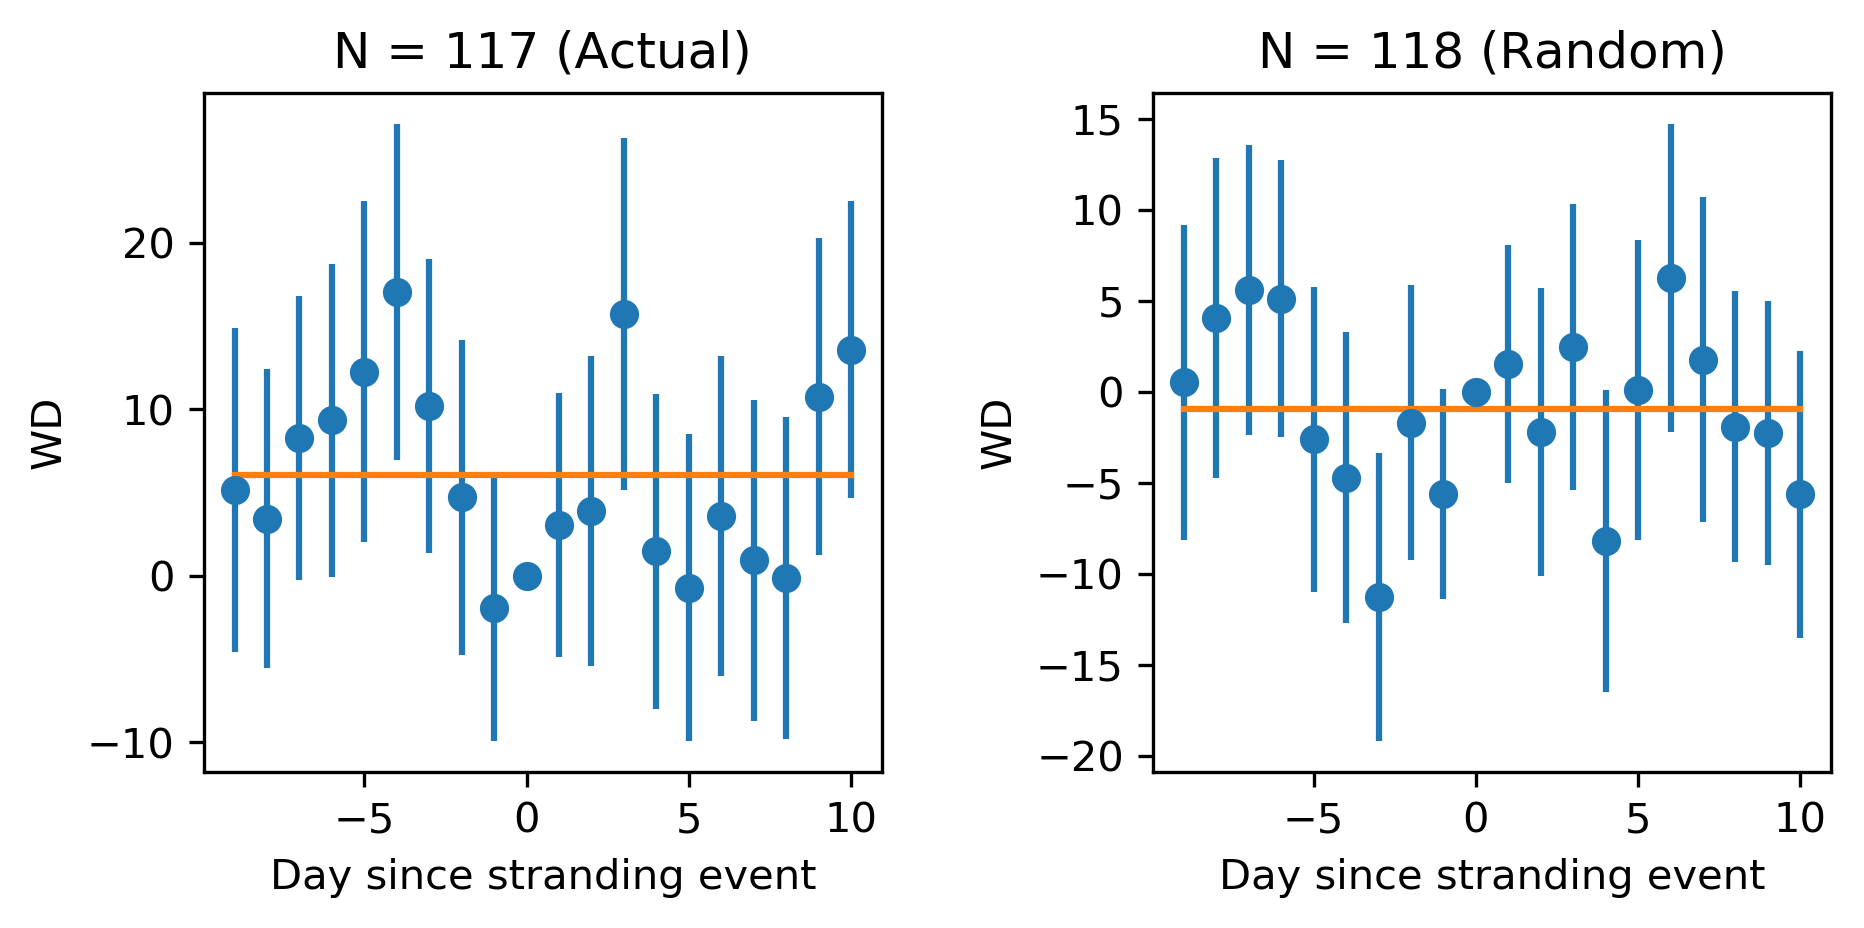

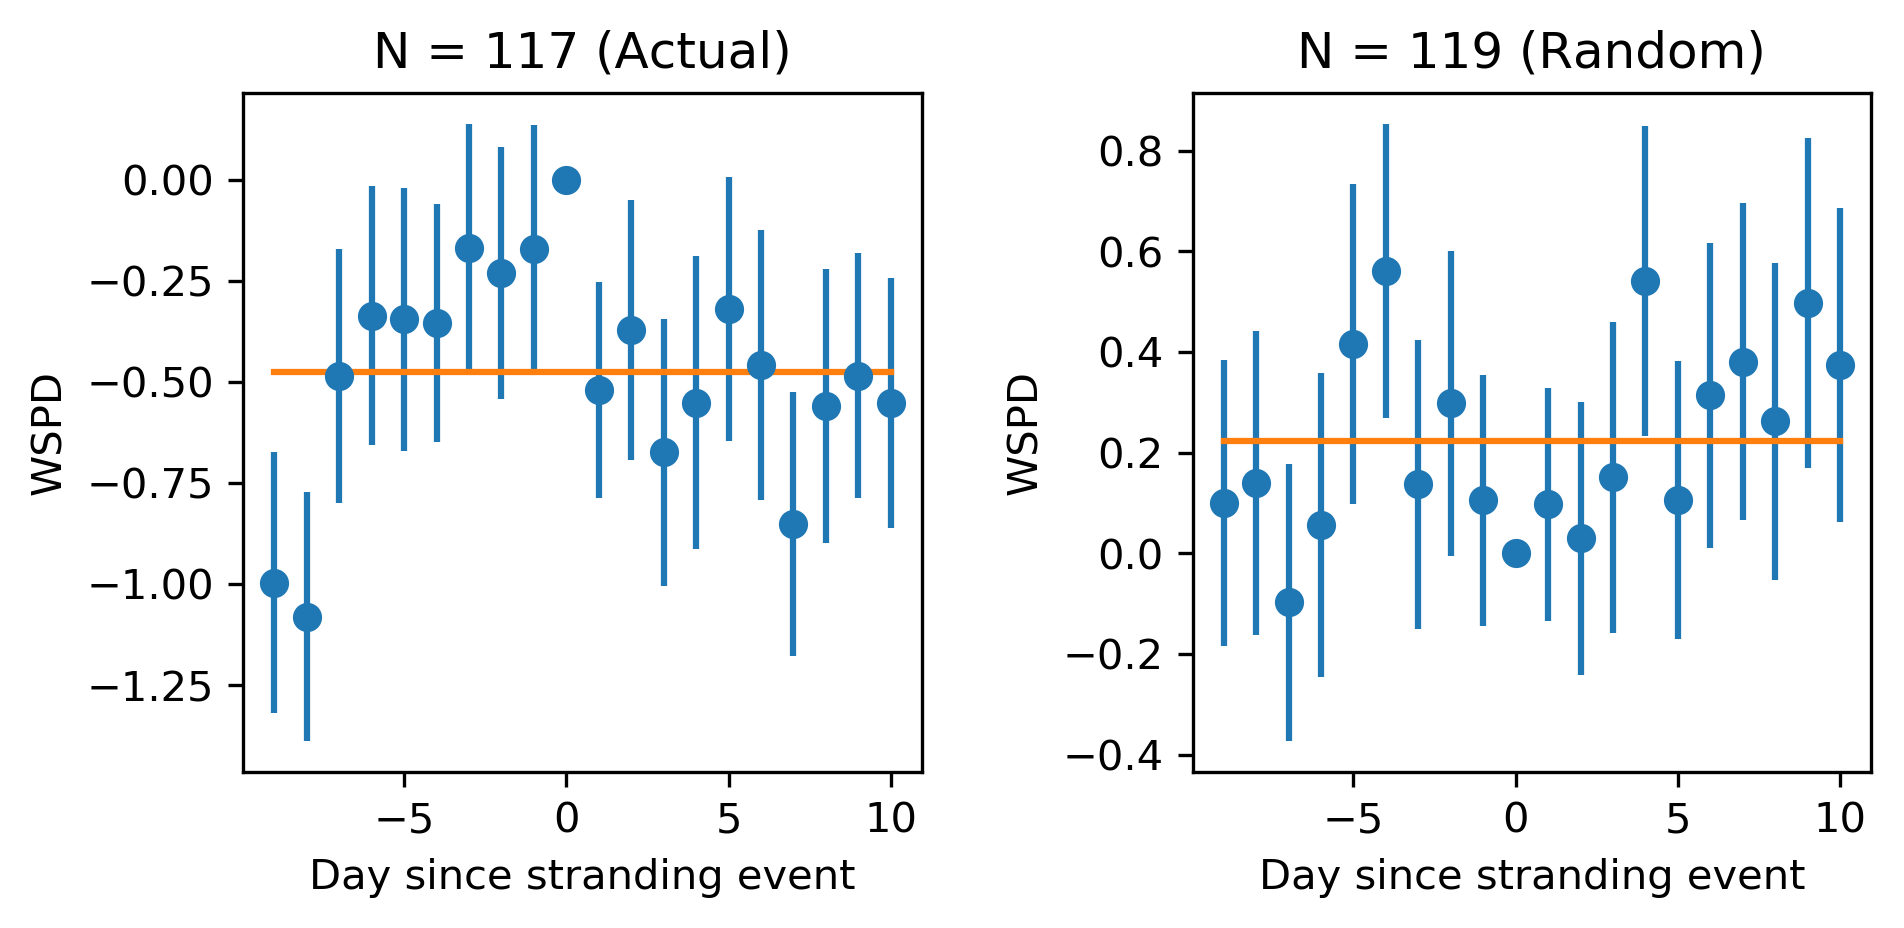

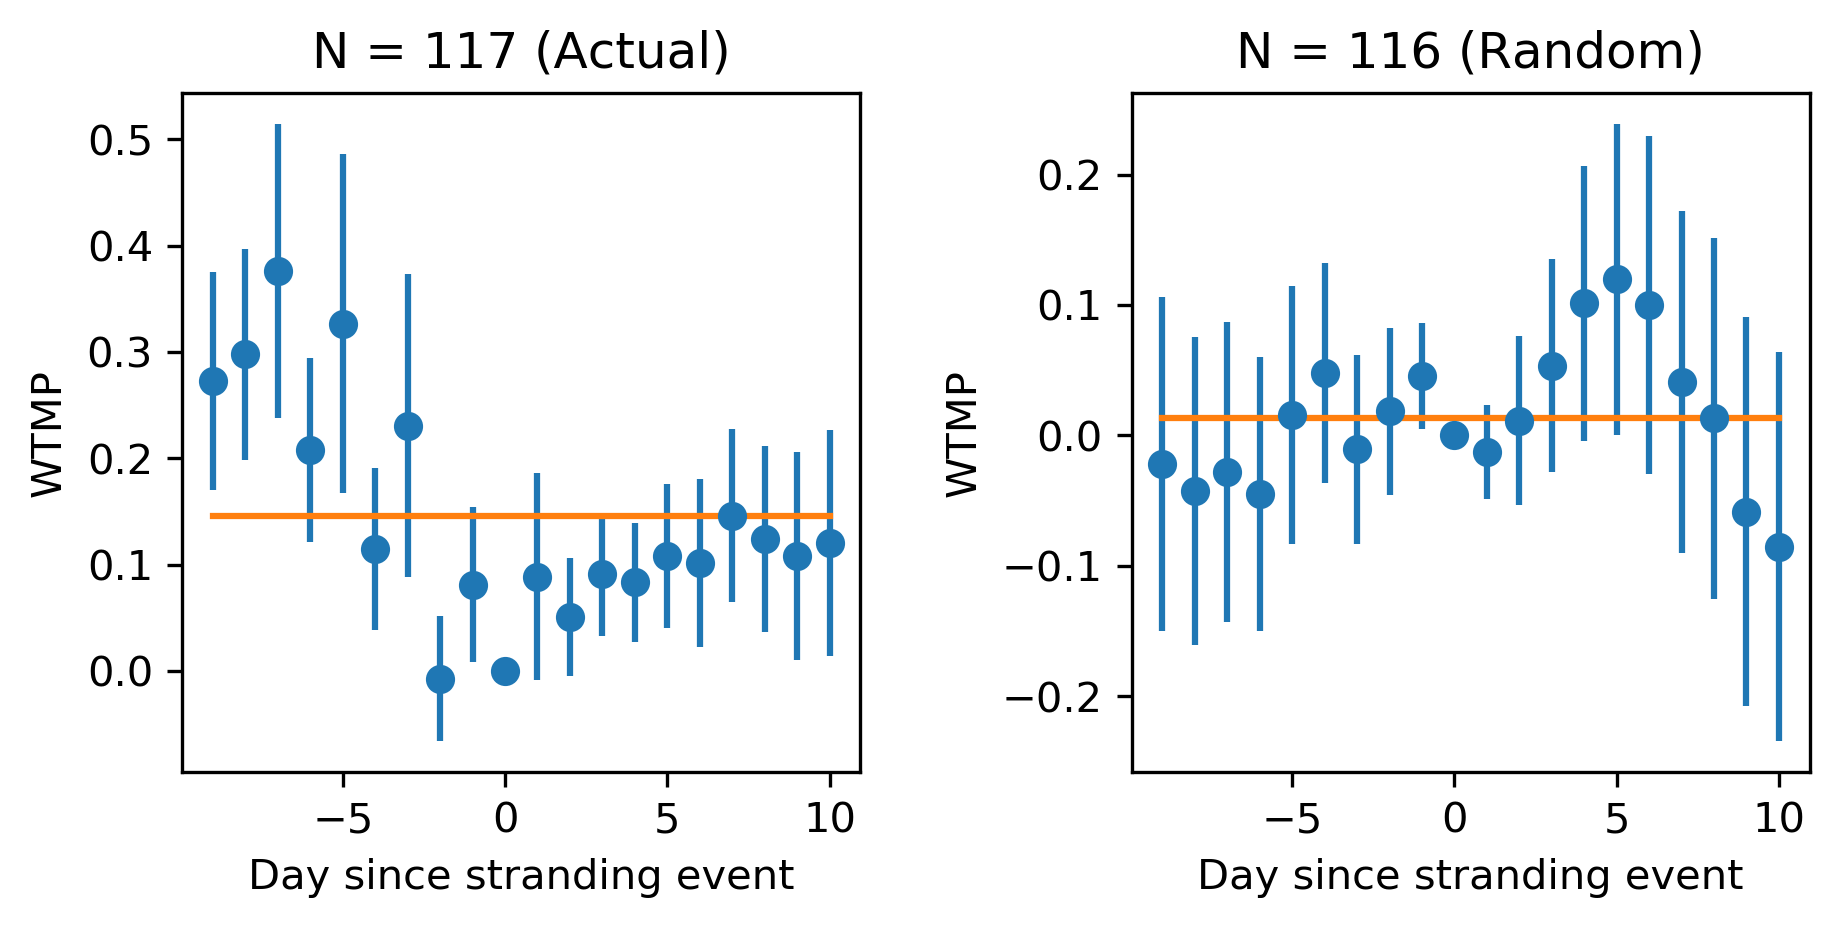

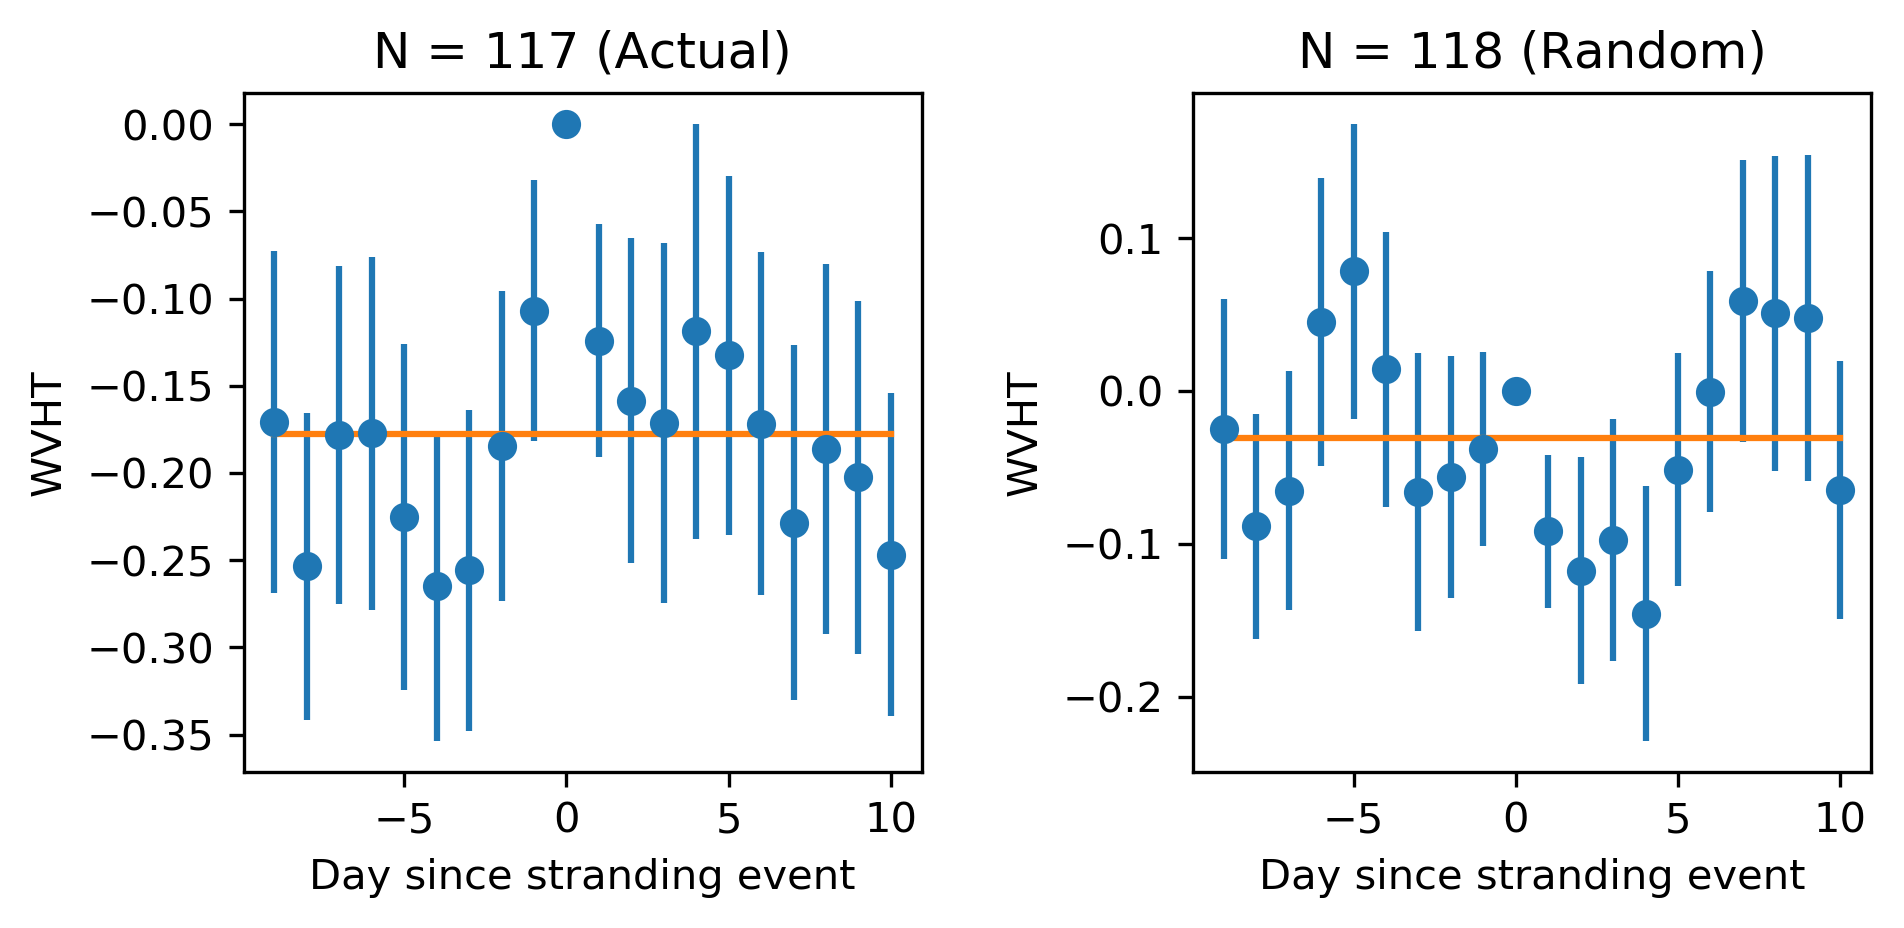

In [23]:
plt.close('all')
from matplotlib import rcParams
rcParams['figure.max_open_warning'] = 100
N = 20 # Length of epoch time series. Assumed to be even
for c in columns:
    dfEpoch,dfEpoch2 = epoch(c)
    epochplot(dfEpoch,dfEpoch2,c)    

In [37]:
dfEvents.index
for c in columns:
    d = np.zeros(len(dfEvents.index))
    d2 = np.zeros(len(dfEvents.index))
    k = 0
    k2 = 0
    a = 1 # after
    b = 1 # before
    for index, row in dfEvents.iterrows():
        r = dfMerged.index.get_loc(index) # Get integer index corresponding to date index
        r2 = np.random.choice(len(dfMerged.index)) # Get random integer index        
        # Extract chunk of time series around date. Subtract off value on date
    
        if r+a < len(dfMerged.index) and r-b >= 0:
            d[k] = dfMerged[c].iloc[r+a] > dfMerged[c].iloc[r-b]
            k = k+1
        if r2+a < len(dfMerged.index) and r2-b >= 0:
            d2[k] = dfMerged[c].iloc[r2+a] > dfMerged[c].iloc[r2-b]
            k2 = k2+1
    d = d[0:k]
    d2 = d2[0:k2]
    N  = len(d)        
    Ni = sum(d) # Increasing trend
    Nd = N-sum(d) # Decreasing trend
    N2  = len(d2)        
    Ni2 = sum(d2) # Increasing trend
    Nd2 = N2-sum(d2) # Decreasing trend
    print('%s(t+%d) > %s(t-%d):  %d (%.2f%%) (Random = %.2f%%)' % (c,b,c,a,Ni,100*Ni/N,100*Ni2/N2))
    print('%s(t+%d) <= %s(t-%d): %d (%.2f%%) (Random = %.2f%%)' % (c,b,c,a,Nd,100*Nd/N,100*Nd2/N2))
    print('----')

FRDH(t+1) > FRDH(t-1):  61 (52.14%) (Random = 55.46%)
FRDH(t+1) <= FRDH(t-1): 56 (47.86%) (Random = 44.54%)
----
FRDV(t+1) > FRDV(t-1):  56 (47.86%) (Random = 49.58%)
FRDV(t+1) <= FRDV(t-1): 61 (52.14%) (Random = 50.42%)
----
OTTH(t+1) > OTTH(t-1):  58 (49.57%) (Random = 54.24%)
OTTH(t+1) <= OTTH(t-1): 59 (50.43%) (Random = 45.76%)
----
OTTV(t+1) > OTTV(t-1):  49 (41.88%) (Random = 47.46%)
OTTV(t+1) <= OTTV(t-1): 68 (58.12%) (Random = 52.54%)
----
dH(t+1) > dH(t-1):  60 (51.28%) (Random = 49.58%)
dH(t+1) <= dH(t-1): 57 (48.72%) (Random = 50.42%)
----
dV(t+1) > dV(t-1):  58 (49.57%) (Random = 51.26%)
dV(t+1) <= dV(t-1): 59 (50.43%) (Random = 48.74%)
----
Kp_index(t+1) > Kp_index(t-1):  63 (53.85%) (Random = 43.70%)
Kp_index(t+1) <= Kp_index(t-1): 54 (46.15%) (Random = 56.30%)
----
Sunspot_No(t+1) > Sunspot_No(t-1):  48 (41.03%) (Random = 42.86%)
Sunspot_No(t+1) <= Sunspot_No(t-1): 69 (58.97%) (Random = 57.14%)
----
Dst_index(t+1) > Dst_index(t-1):  61 (52.14%) (Random = 63.87%)
Dst_inde